<a href="https://colab.research.google.com/github/MikeSirya/Master-Thesis/blob/main/Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import seaborn as sns


In [ ]:
# Upload your data as CSV and load as a data frame
df = pd.read_csv(
    "TempData21.csv",
    parse_dates=["Timestamp"],  # Tell pandas which column(s) to parse as dates
    index_col="Timestamp",  # Use a date column as your index
)
print(df.shape)
df.head(5)

(21744, 43)


Cinctorres  Forcall  Morella - centre  \
Timestamp                                                    
2021-01-01 00:00:00         4.3      1.7              3.90   
2021-01-01 00:10:00         4.0      0.9              3.90   
2021-01-01 00:20:00         3.4      0.7              3.90   
2021-01-01 00:30:00         3.2      0.4              3.85   
2021-01-01 00:40:00         3.1      0.1              3.70   

                     Olocau del Rei - la Magdalena (Electra del Maestrazgo)  \
Timestamp                                                                     
2021-01-01 00:00:00                                                1.8        
2021-01-01 00:10:00                                                1.9        
2021-01-01 00:20:00                                                1.6        
2021-01-01 00:30:00                                                1.6        
2021-01-01 00:40:00                                                1.6        

                     Portell de Morella  Vallibona  Sorita  Benassal  Catí  \
Timestamp                                                                    
2021-01-01 00:00:00                 4.2        0.6     2.5       3.7  5.70   
2021-01-01 00:10:00                 3.7        0.4     2.2       3.5  5.65   
2021-01-01 00:20:00                 3.6        0.3     1.9       3.8  5.30   
2021-01-01 00:30:00                 3.1        0.1     1.9       3.6  5.25   
2021-01-01 00:40:00                 3.1       -0.1     2.0       3.0  5.05   

                     Catí - l′Avellà  ...  Alcalà de Xivert  \
Timestamp                             ...                     
2021-01-01 00:00:00              NaN  ...              4.80   
2021-01-01 00:10:00             3.30  ...              4.50   
2021-01-01 00:20:00             3.40  ...              4.45   
2021-01-01 00:30:00              NaN  ...              4.95   
2021-01-01 00:40:00             3.15  ...              4.90   

                     Alcalà de Xivert Alcossebre  Peníscola  Sant Mateu  \
Timestamp                                                                 
2021-01-01 00:00:00                         8.20       9.55        2.60   
2021-01-01 00:10:00                         8.90       9.85        2.35   
2021-01-01 00:20:00                         8.80       8.90        1.80   
2021-01-01 00:30:00                         8.75       8.60        1.80   
2021-01-01 00:40:00                         9.60       8.80        2.55   

                     l′Alcora  Castelló de la Plana PortCastelló Sud  \
Timestamp                                                              
2021-01-01 00:00:00       6.9                                   9.70   
2021-01-01 00:10:00       6.2                                  10.15   
2021-01-01 00:20:00       6.1                                  10.40   
2021-01-01 00:30:00       7.3                                  10.30   
2021-01-01 00:40:00       7.9                                  10.20   

                     Castelló de la Plana Palau de la Festa  \
Timestamp                                                     
2021-01-01 00:00:00                                    9.65   
2021-01-01 00:10:00                                    9.65   
2021-01-01 00:20:00                                    9.40   
2021-01-01 00:30:00                                    9.45   
2021-01-01 00:40:00                                    9.45   

                     Orpesa Ajuntament  Orpesa Torre Bellver  \
Timestamp                                                      
2021-01-01 00:00:00          11.700000                  7.35   
2021-01-01 00:10:00          11.800000                  7.10   
2021-01-01 00:20:00          11.700000                  7.35   
2021-01-01 00:30:00          11.700000                  7.55   
2021-01-01 00:40:00          11.633333                  9.45   

                     la Torre d′en Doménec  
Timestamp                                   
2021-01-01 00:00:00            

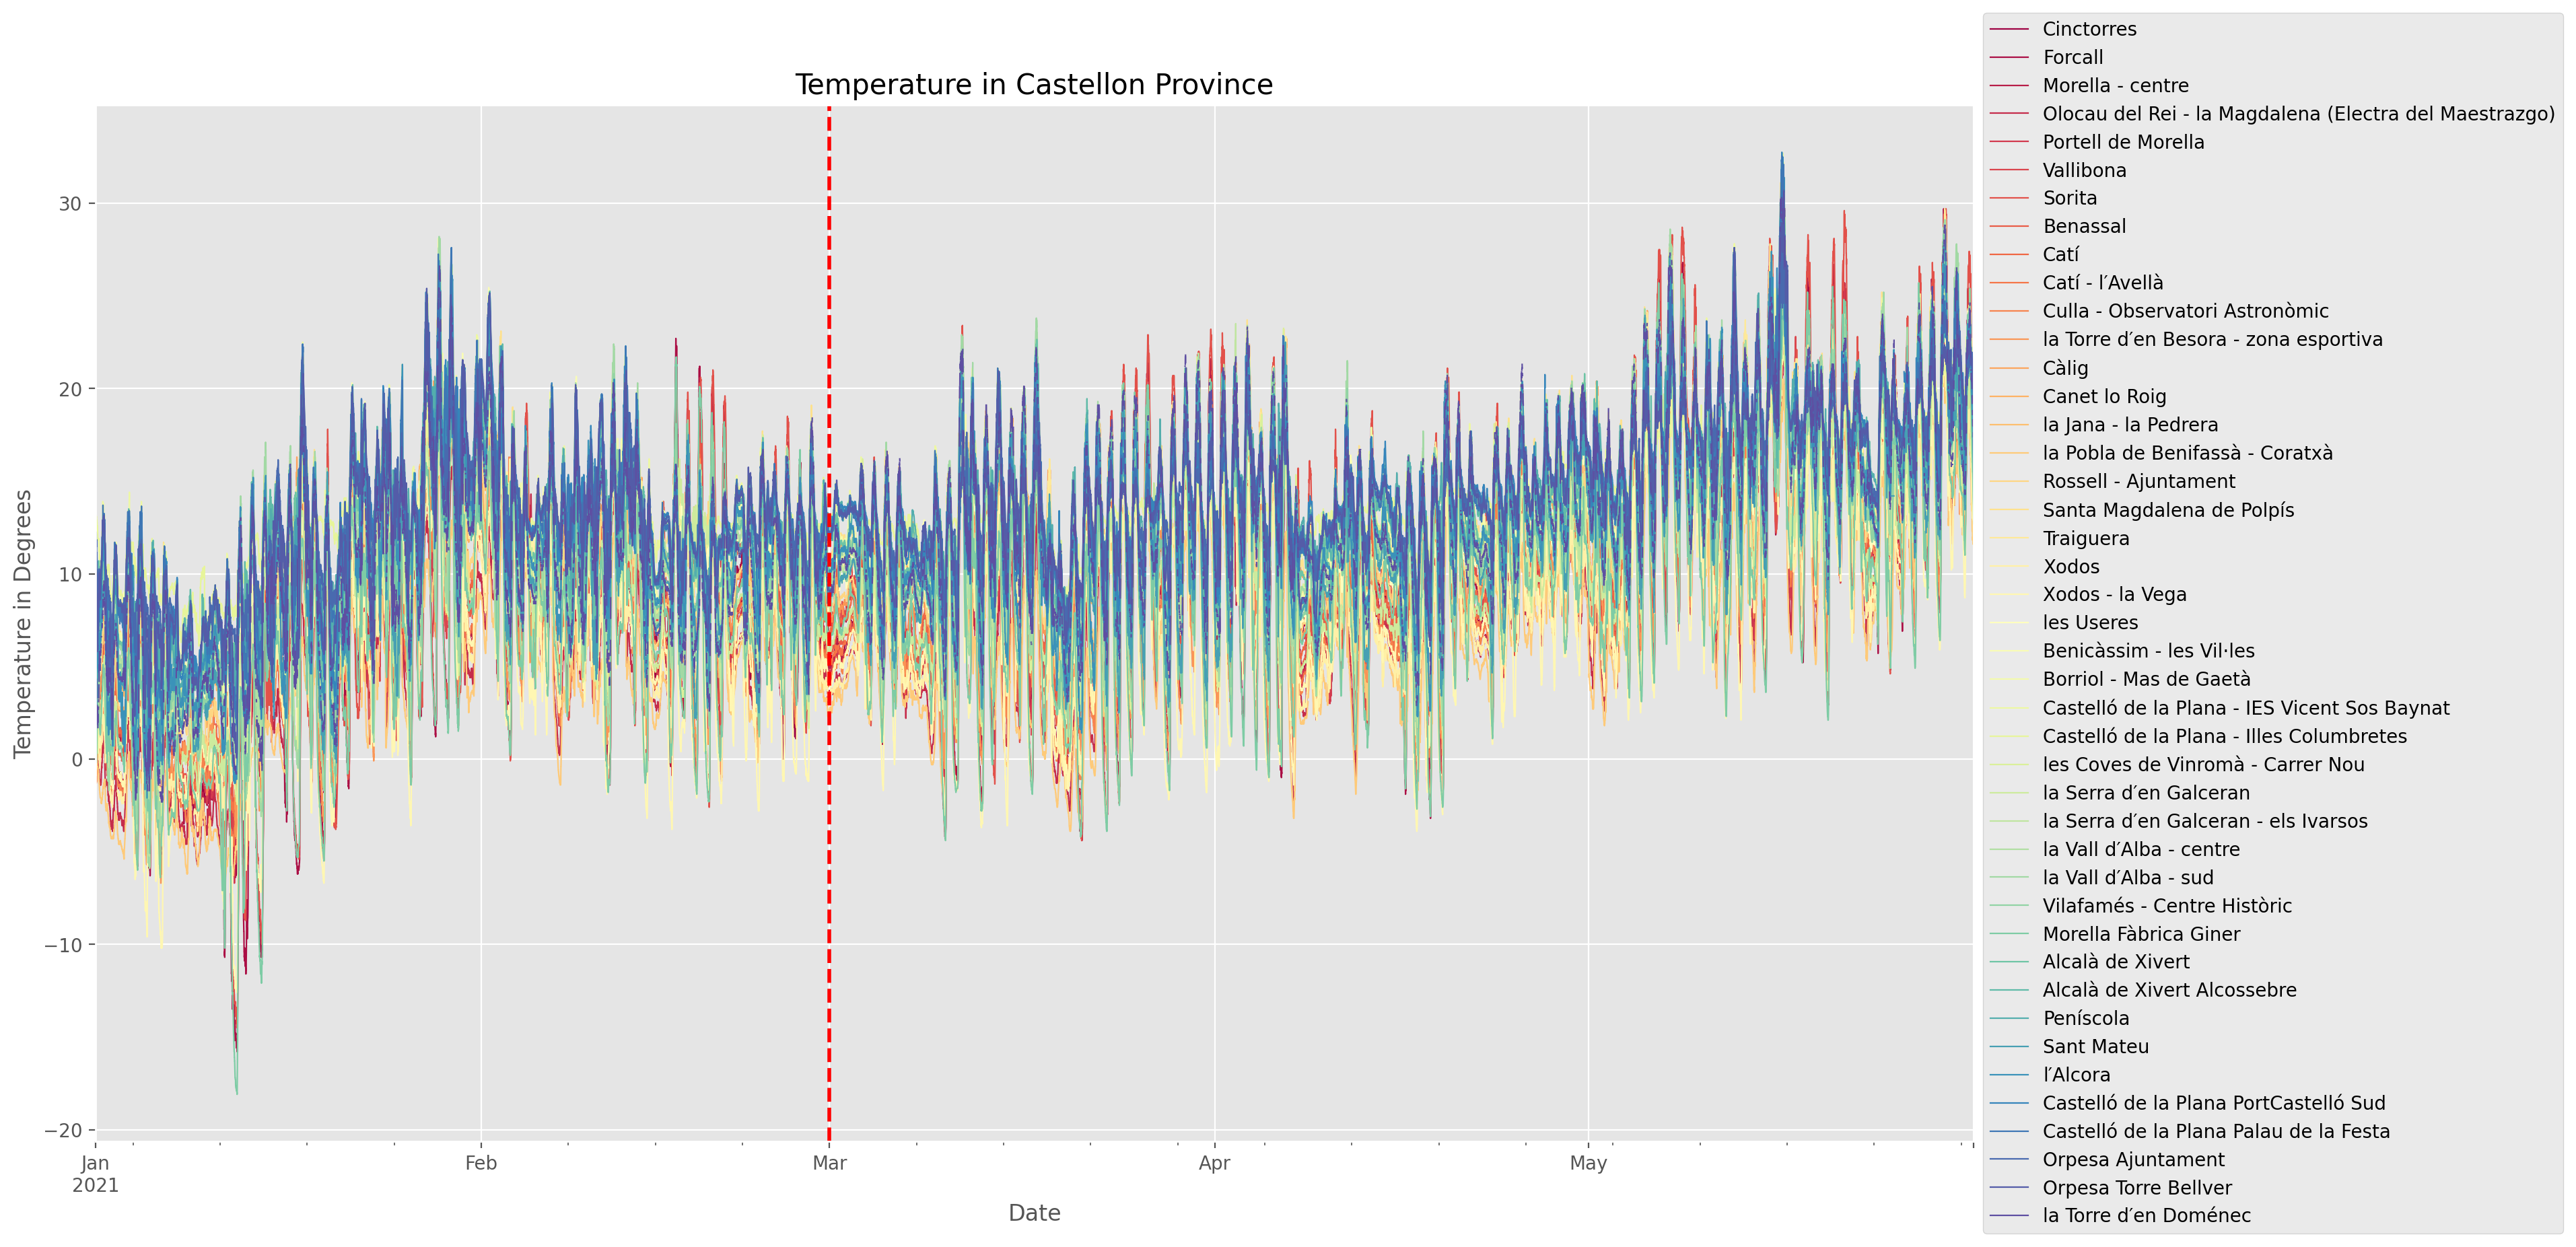

In [ ]:
# Plot settings
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (18, 10)
plt.style.use('ggplot')

# Plot all time series in the df DataFrame
ax = df.plot(
    colormap="Spectral",  # Set a colormap to avoid overlapping colors
    fontsize=10,  # Set fontsize
    linewidth=0.8, # Set width of lines
)

# Set labels and legend
ax.set_xlabel("Date", fontsize=12)  # X axis text
ax.set_ylabel("Temperature in Degrees", fontsize=12) # Set font size
ax.set_title("Temperature in Castellon Province", fontsize=15)
ax.legend(
    loc="center left",  # Set location of legend within bounding box
    bbox_to_anchor=(1.0, 0.5),  # Set location of bounding box
)

# Annotate your plots with vertical lines
ax.axvline(
    "2001-07-01",  # Position of vertical line
    color="red",  # Color of line
    linestyle="--",  # Style of line
    linewidth=2, # Thickness of line
)
ax.axvline("2021-03-01", color="red", linestyle="--", linewidth=2)

# Show plot
plt.show()


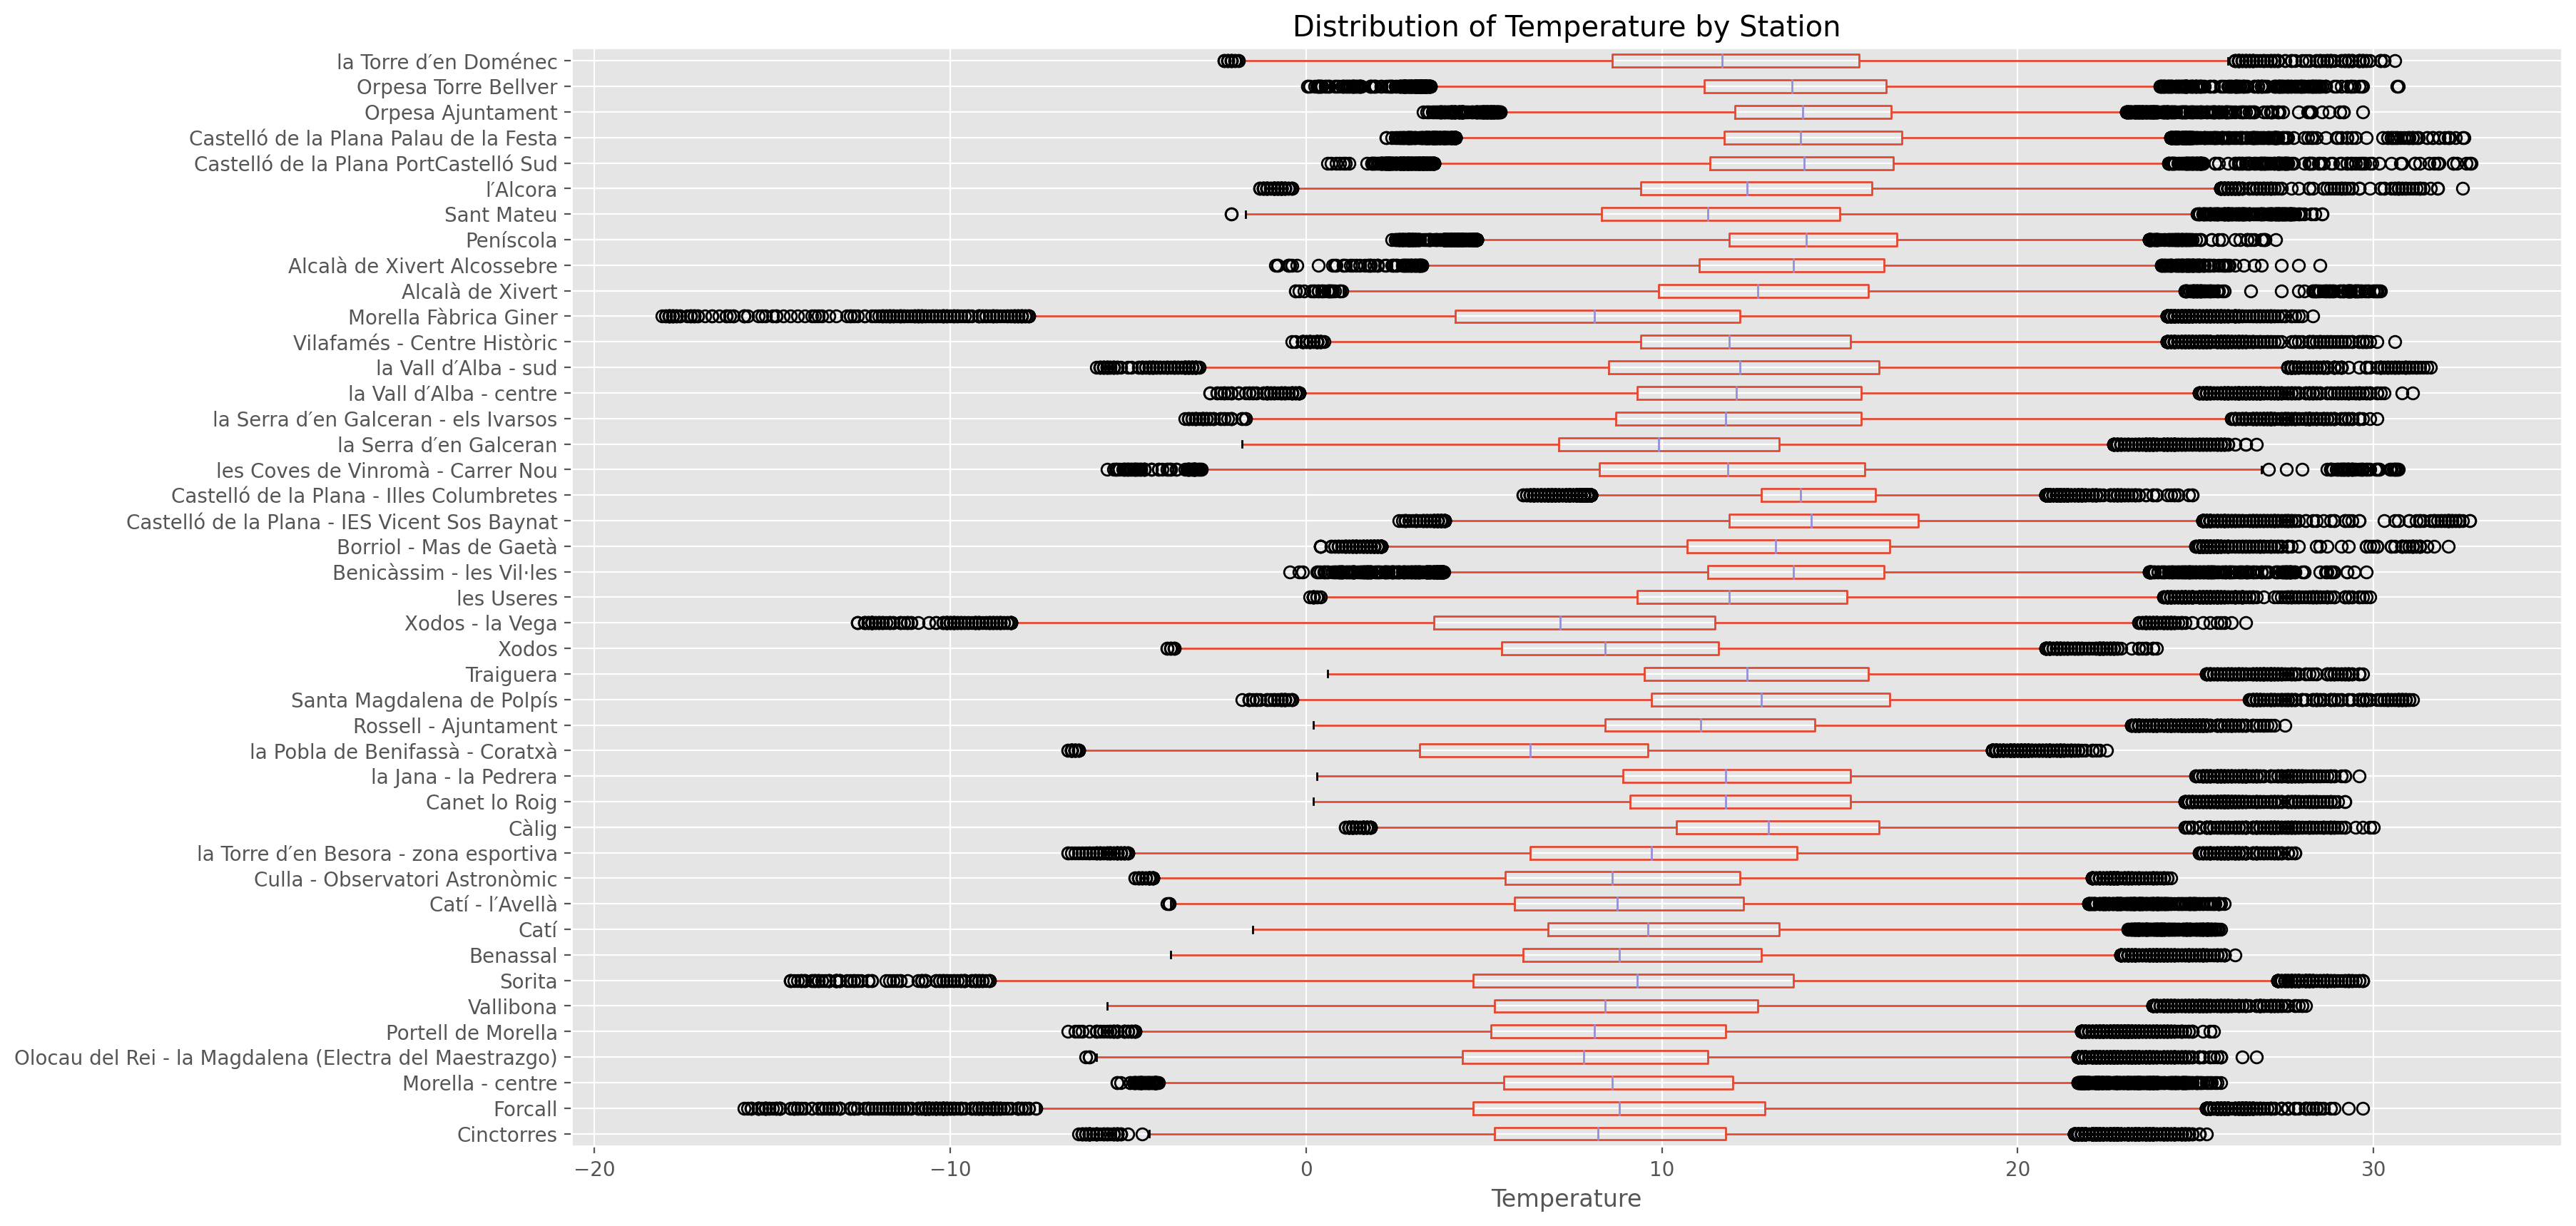

In [ ]:
# Generate a boxplot
ax = df.boxplot(fontsize=10, vert=False)  # Plots boxplot horizonally if false
ax.set_xlabel("Temperature")
ax.set_title("Distribution of Temperature by Station")
plt.show()


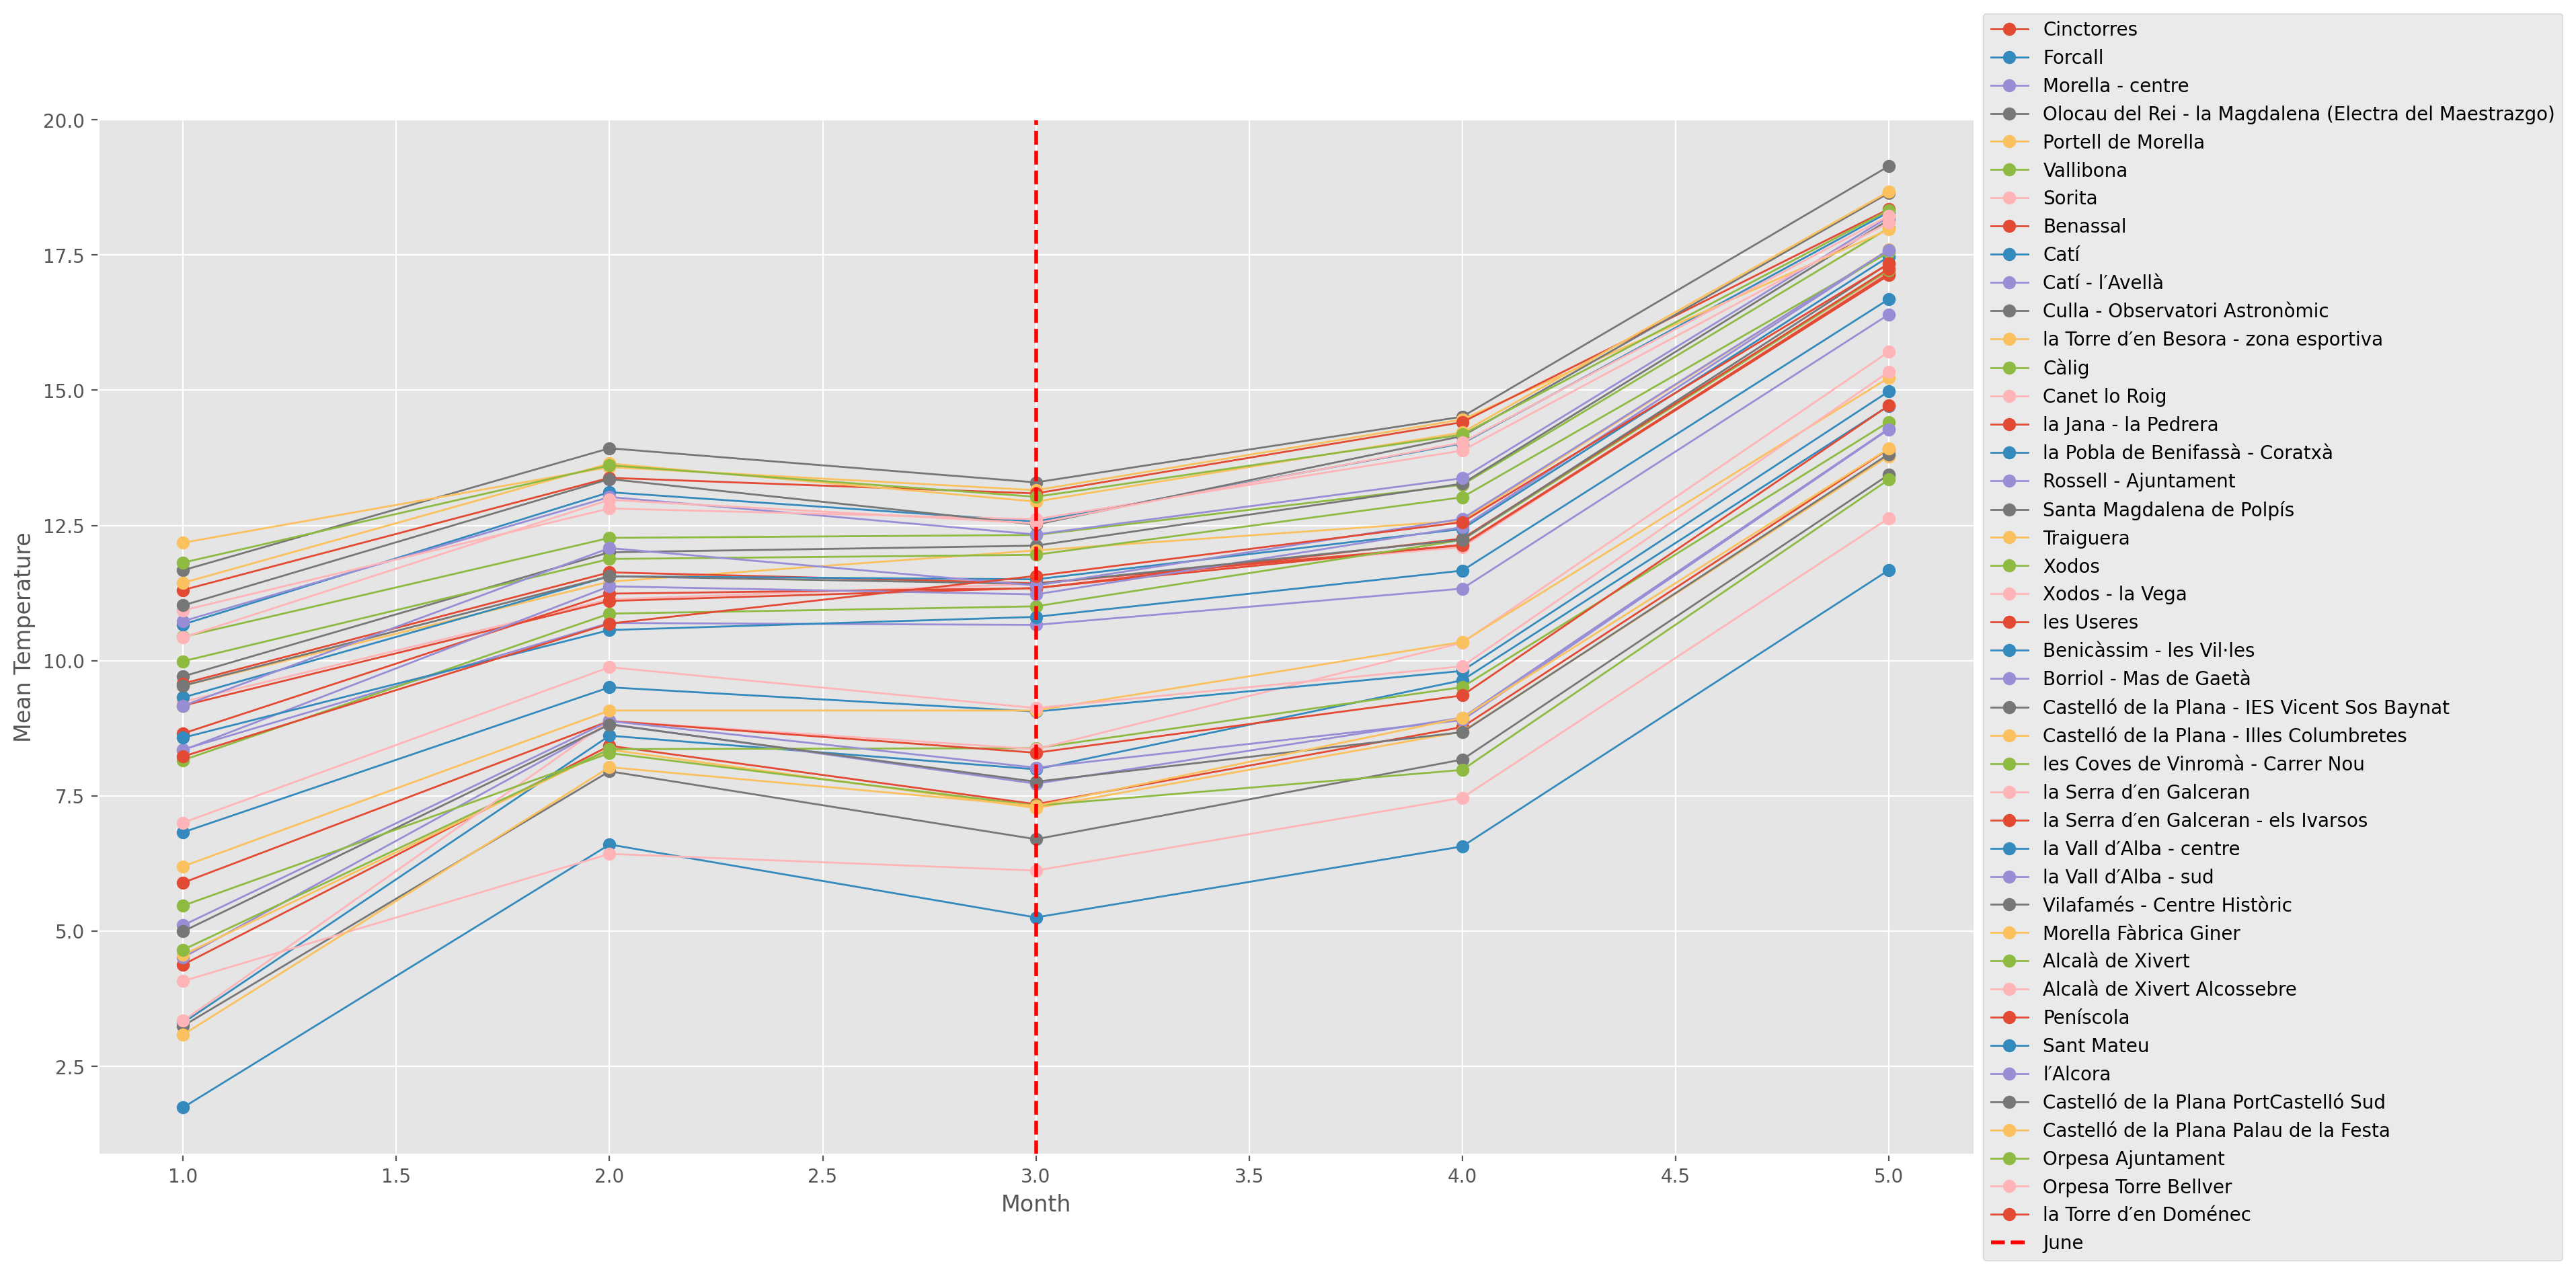

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with the provided sample data

# Convert the index to datetime
df.index = pd.to_datetime(df.index)

# Extract the month from the datetime index
index_month = df.index.month

# Compute mean temperature for each month
df_by_month = df.groupby(index_month).mean()

# Plot the mean temperature for each month
ax = df_by_month.plot(fontsize=10, linewidth=1, marker='o')

# Set axis labels and legend
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Mean Temperature", fontsize=12)

# Optionally, you can add a vertical line at a specific month
# For example, adding a line at June (assuming months are represented as numbers)
ax.axvline(
    3,
    color="red",
    linestyle="--",
    linewidth=2,
    label="June",
)

# Place the legend outside the plot
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.show()


In [ ]:
# Assuming 'df' is your DataFrame with the provided sample data
# You may replace this with your actual DataFrame

# Count missing values per column
missing_values_count = df.isnull().sum()

# Display the count of missing values
print("Missing values per column:")
print(missing_values_count)


Missing values per column:
Cinctorres                                                   6
Forcall                                                      6
Morella - centre                                             6
Olocau del Rei - la Magdalena (Electra del Maestrazgo)       6
Portell de Morella                                           7
Vallibona                                                   70
Sorita                                                     154
Benassal                                                    17
Catí                                                       130
Catí - l′Avellà                                            537
Culla - Observatori Astronòmic                               6
la Torre d′en Besora - zona esportiva                       33
Càlig                                                        6
Canet lo Roig                                                6
la Jana - la Pedrera                                        38
la Pobla de Benifassà - Cora

In [ ]:
import pandas as pd
# Choose a strategy based on the nature of your data
fill_strategy = "mean"  # Options: "mean", "median", "ffill" (forward fill)

# Apply the chosen strategy to fill null values
if fill_strategy == "mean":
    df_filled = df.fillna(df.mean())
elif fill_strategy == "median":
    df_filled = df.fillna(df.median())
elif fill_strategy == "ffill":
    df_filled = df.ffill()  # Forward fill

# Display the DataFrame with missing values filled
print("\nDataFrame with missing values filled:")
df= df_filled
# Save the modified second CSV file
df.to_csv('/content/TempDataFilled21.csv', index=True)
df.head()



DataFrame with missing values filled:


Cinctorres  Forcall  Morella - centre  \
Timestamp                                           
2021-01-01         4.3      1.7               3.9   
2021-01-02         0.3      2.1              -0.1   
2021-01-03        -0.8      1.1              -1.2   
2021-01-04         1.2     -0.3               0.7   
2021-01-05        -0.5     -1.4              -0.5   

            Olocau del Rei - la Magdalena (Electra del Maestrazgo)  \
Timestamp                                                            
2021-01-01                                                1.8        
2021-01-02                                               -1.9        
2021-01-03                                               -3.1        
2021-01-04                                               -0.7        
2021-01-05                                               -2.1        

            Portell de Morella  Vallibona  Sorita  Benassal  Catí  \
Timestamp                                                           
2021-01-01                 4.2        0.6     2.5       3.7  5.70   
2021-01-02                 0.0       -0.7     2.2       1.6  2.95   
2021-01-03                -1.4        1.4     1.6       0.3  1.55   
2021-01-04                 1.5       -0.4    -1.1       0.9  4.00   
2021-01-05                -0.7       -0.3    -2.4      -0.4  1.40   

            Catí - l′Avellà  ...  Alcalà de Xivert  \
Timestamp                    ...                     
2021-01-01         9.082338  ...              4.80   
2021-01-02         0.300000  ...              4.90   
2021-01-03        -0.800000  ...              6.30   
2021-01-04         1.600000  ...              2.10   
2021-01-05        -0.600000  ...              1.25   

            Alcalà de Xivert Alcossebre  Peníscola  Sant Mateu  l′Alcora  \
Timestamp                                                                  
2021-01-01                         8.20       9.55    2.600000       6.9   
2021-01-02                         4.00       9.05    5.700000       2.6   
2021-01-03                         7.80       7.75    4.500000       4.1   
2021-01-04                         4.50       9.60    1.400000       5.8   
2021-01-05                         3.45       7.95   11.689023       1.3   

            Castelló de la Plana PortCastelló Sud  \
Timestamp                                           
2021-01-01                                   9.70   
2021-01-02                                   6.20   
2021-01-03                                   8.15   
2021-01-04                                   9.10   
2021-01-05                                   5.70   

            Castelló de la Plana Palau de la Festa  Orpesa Ajuntament  \
Timestamp                                                               
2021-01-01                                    9.65          11.700000   
2021-01-02                                    7.10           8.966667   
2021-01-03                                    7.95           8.500000   
2021-01-04                                    8.70           7.766667   
2021-01-05                                    6.80           7.233333   

            Orpesa Torre Bellver  la Torre d′en Doménec  
Timestamp                                                
2021-01-01                  7.35              12.082713  
2021-01-02                  3.55               4.200000  
2021-01-03                  8.25               4.300000  
2021-01-04                  3.45               2.200000  
2021-01-05                  3.05              -0.400000  

[5 rows x 43 columns]

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'df' is your DataFrame with the provided sample data
# You may replace this with your actual DataFrame

# Convert the index to datetime, if not already in datetime format
df.index = pd.to_datetime(df.index)

# Infer the frequency of the time index
print("Inferred Frequency:", pd.infer_freq(df.index))

# Set the frequency to daily ('D')
df = df.asfreq('D')

# Confirm the new frequency
print("New Frequency:", pd.infer_freq(df.index))


Inferred Frequency: 10T
New Frequency: D


In [ ]:
# Run time series decomposition on each time series of the DataFrame
df_names = df.columns
df_decomp = {ts: sm.tsa.seasonal_decompose(df[ts]) for ts in df.columns}

# Capture the seasonal, trend and noise components for the decomposition of each time series
seasonal_dict = {ts: df_decomp[ts].seasonal for ts in df_names}
trend_dict = {ts: df_decomp[ts].trend for ts in df_names}
noise_dict = {ts: df_decomp[ts].resid for ts in df_names}

# Create a DataFrame from the dictionaries
seasonality_df = pd.DataFrame.from_dict(seasonal_dict)
trend_df = pd.DataFrame.from_dict(trend_dict)
noise_df = pd.DataFrame.from_dict(noise_dict)

# Remove the label for the index
seasonality_df.index.name = None
trend_df.index.name = None
noise_df.index.name = None


<Axes: >

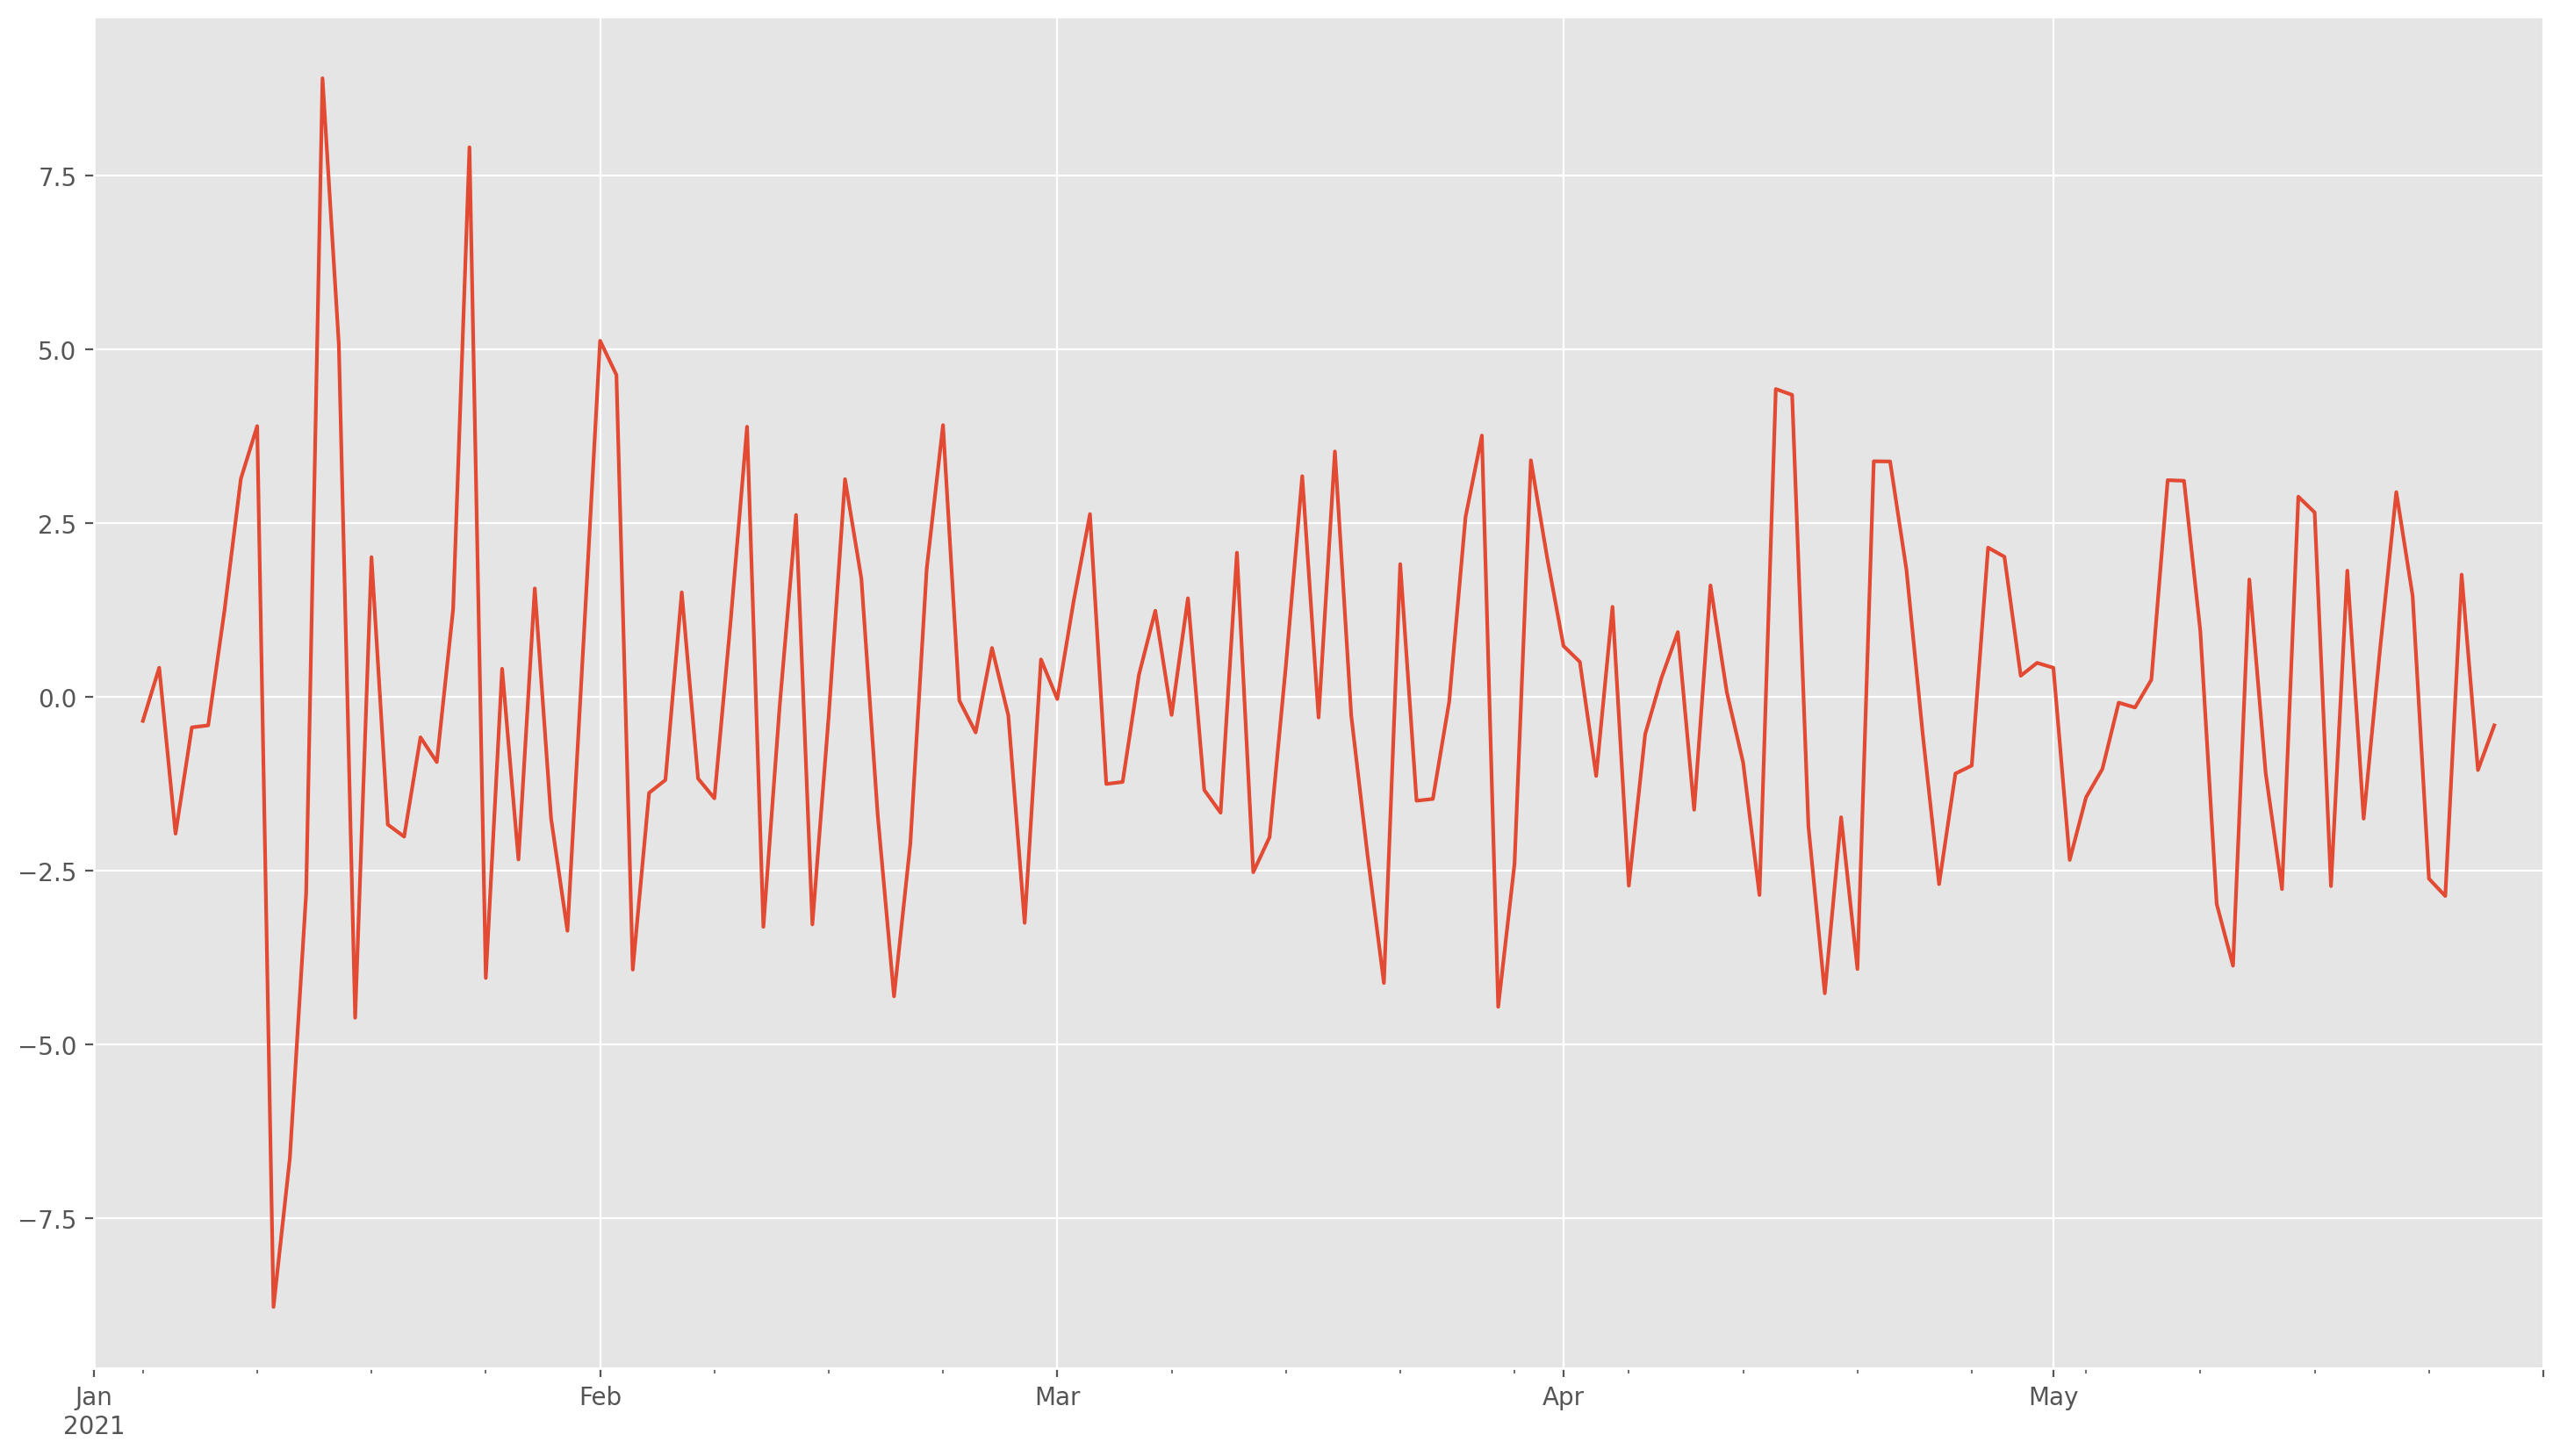

In [ ]:
# Look at individual seasonality, trend or noise
noise_df["Forcall"].plot()
# Change the dataframe and colum to explore


<Axes: >

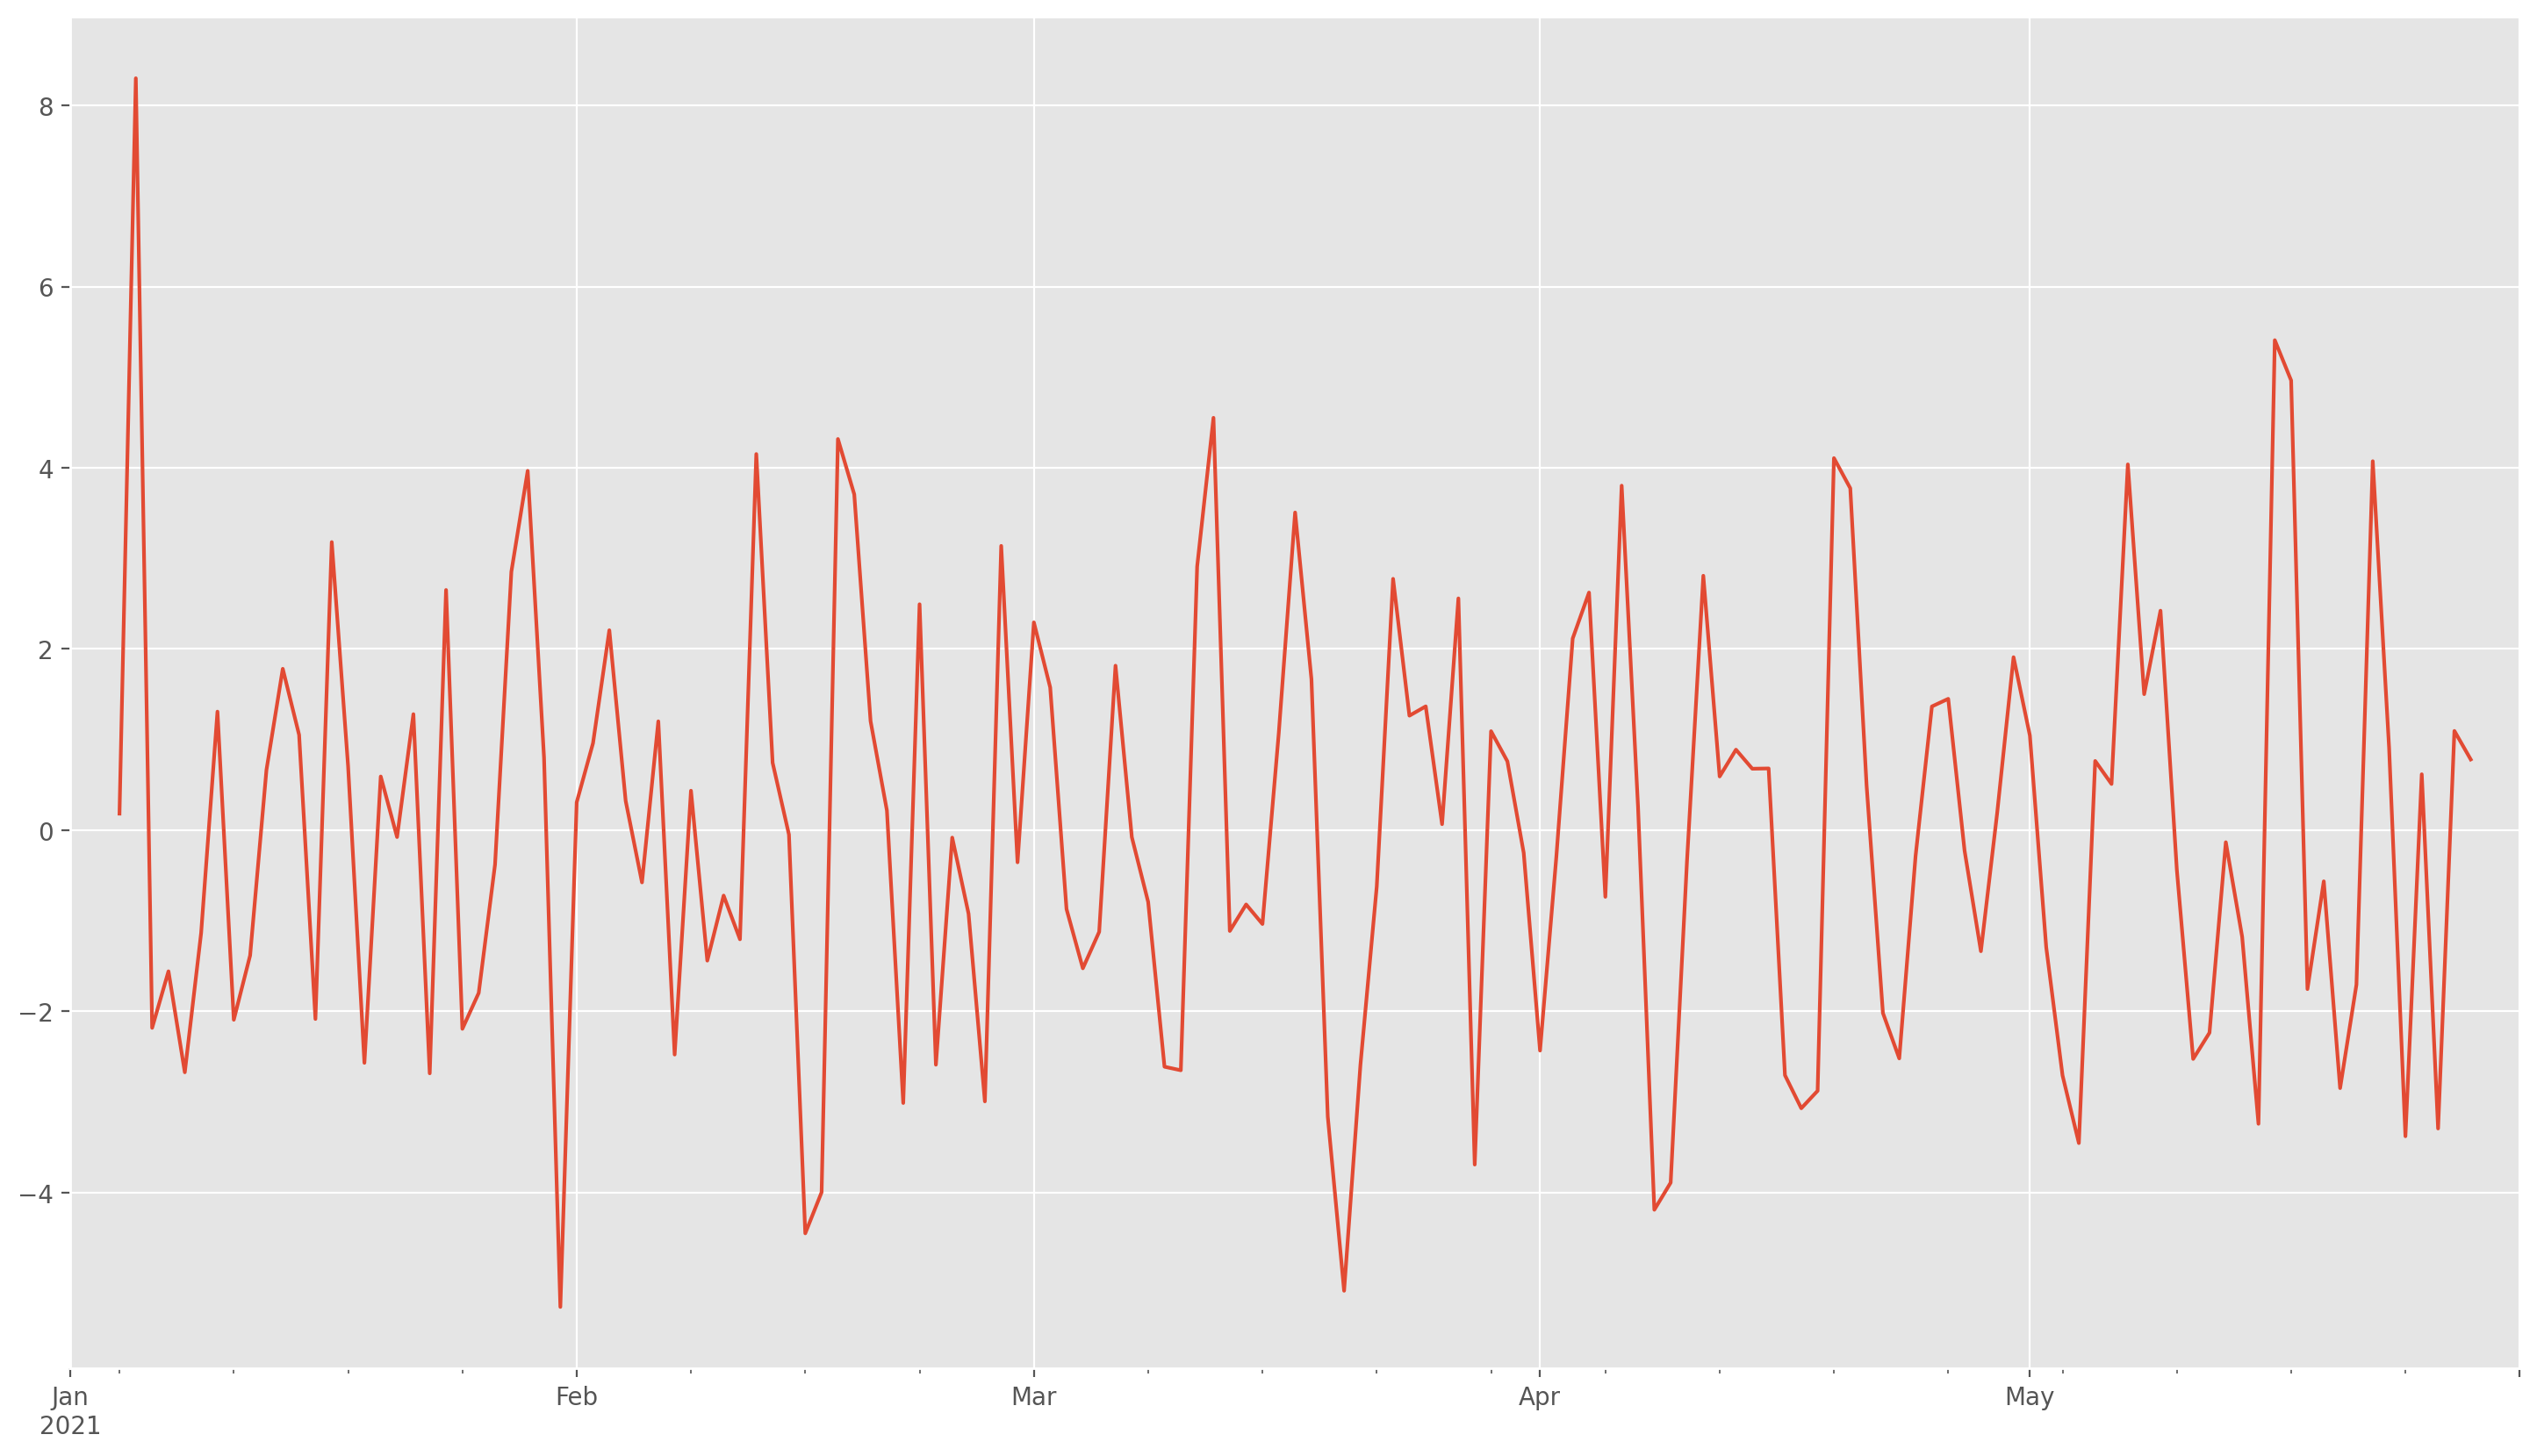

In [ ]:
# Look at individual seasonality, trend or noise
noise_df["Xodos"].plot()
# Change the dataframe and colum to explore


<Axes: >

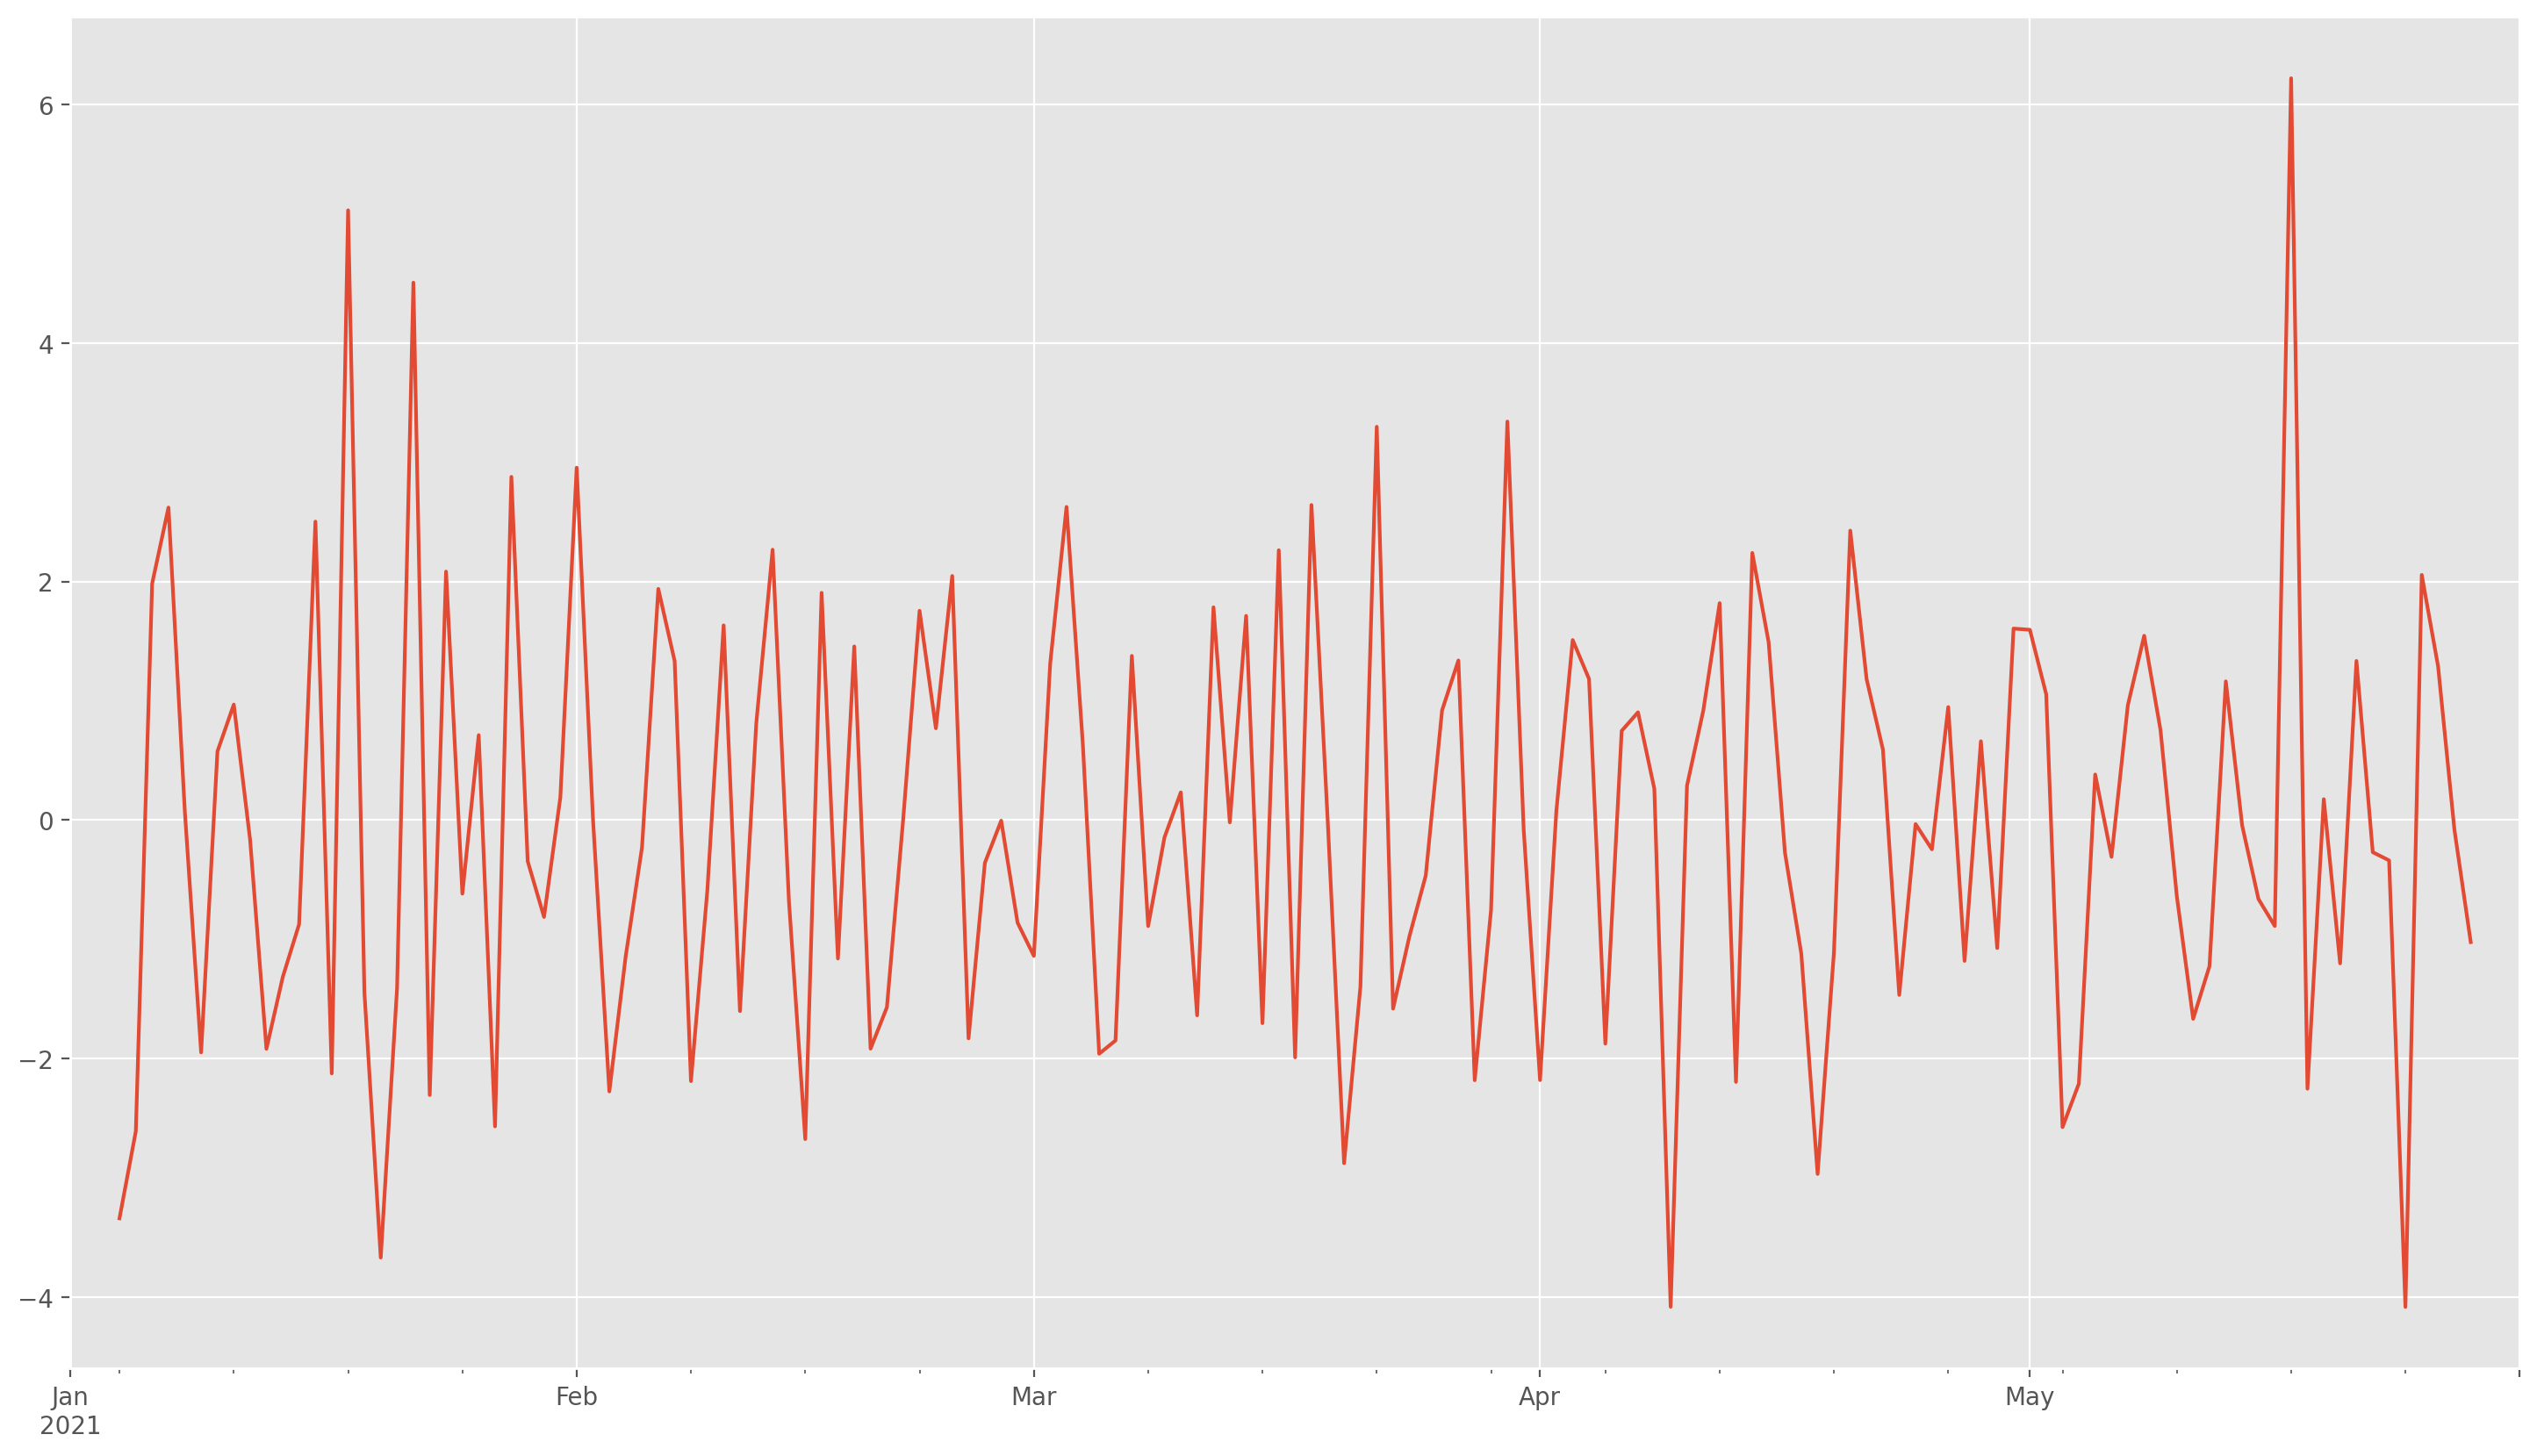

In [ ]:
# Look at individual seasonality, trend or noise
noise_df["Orpesa Torre Bellver"].plot()
# Change the dataframe and colum to explore


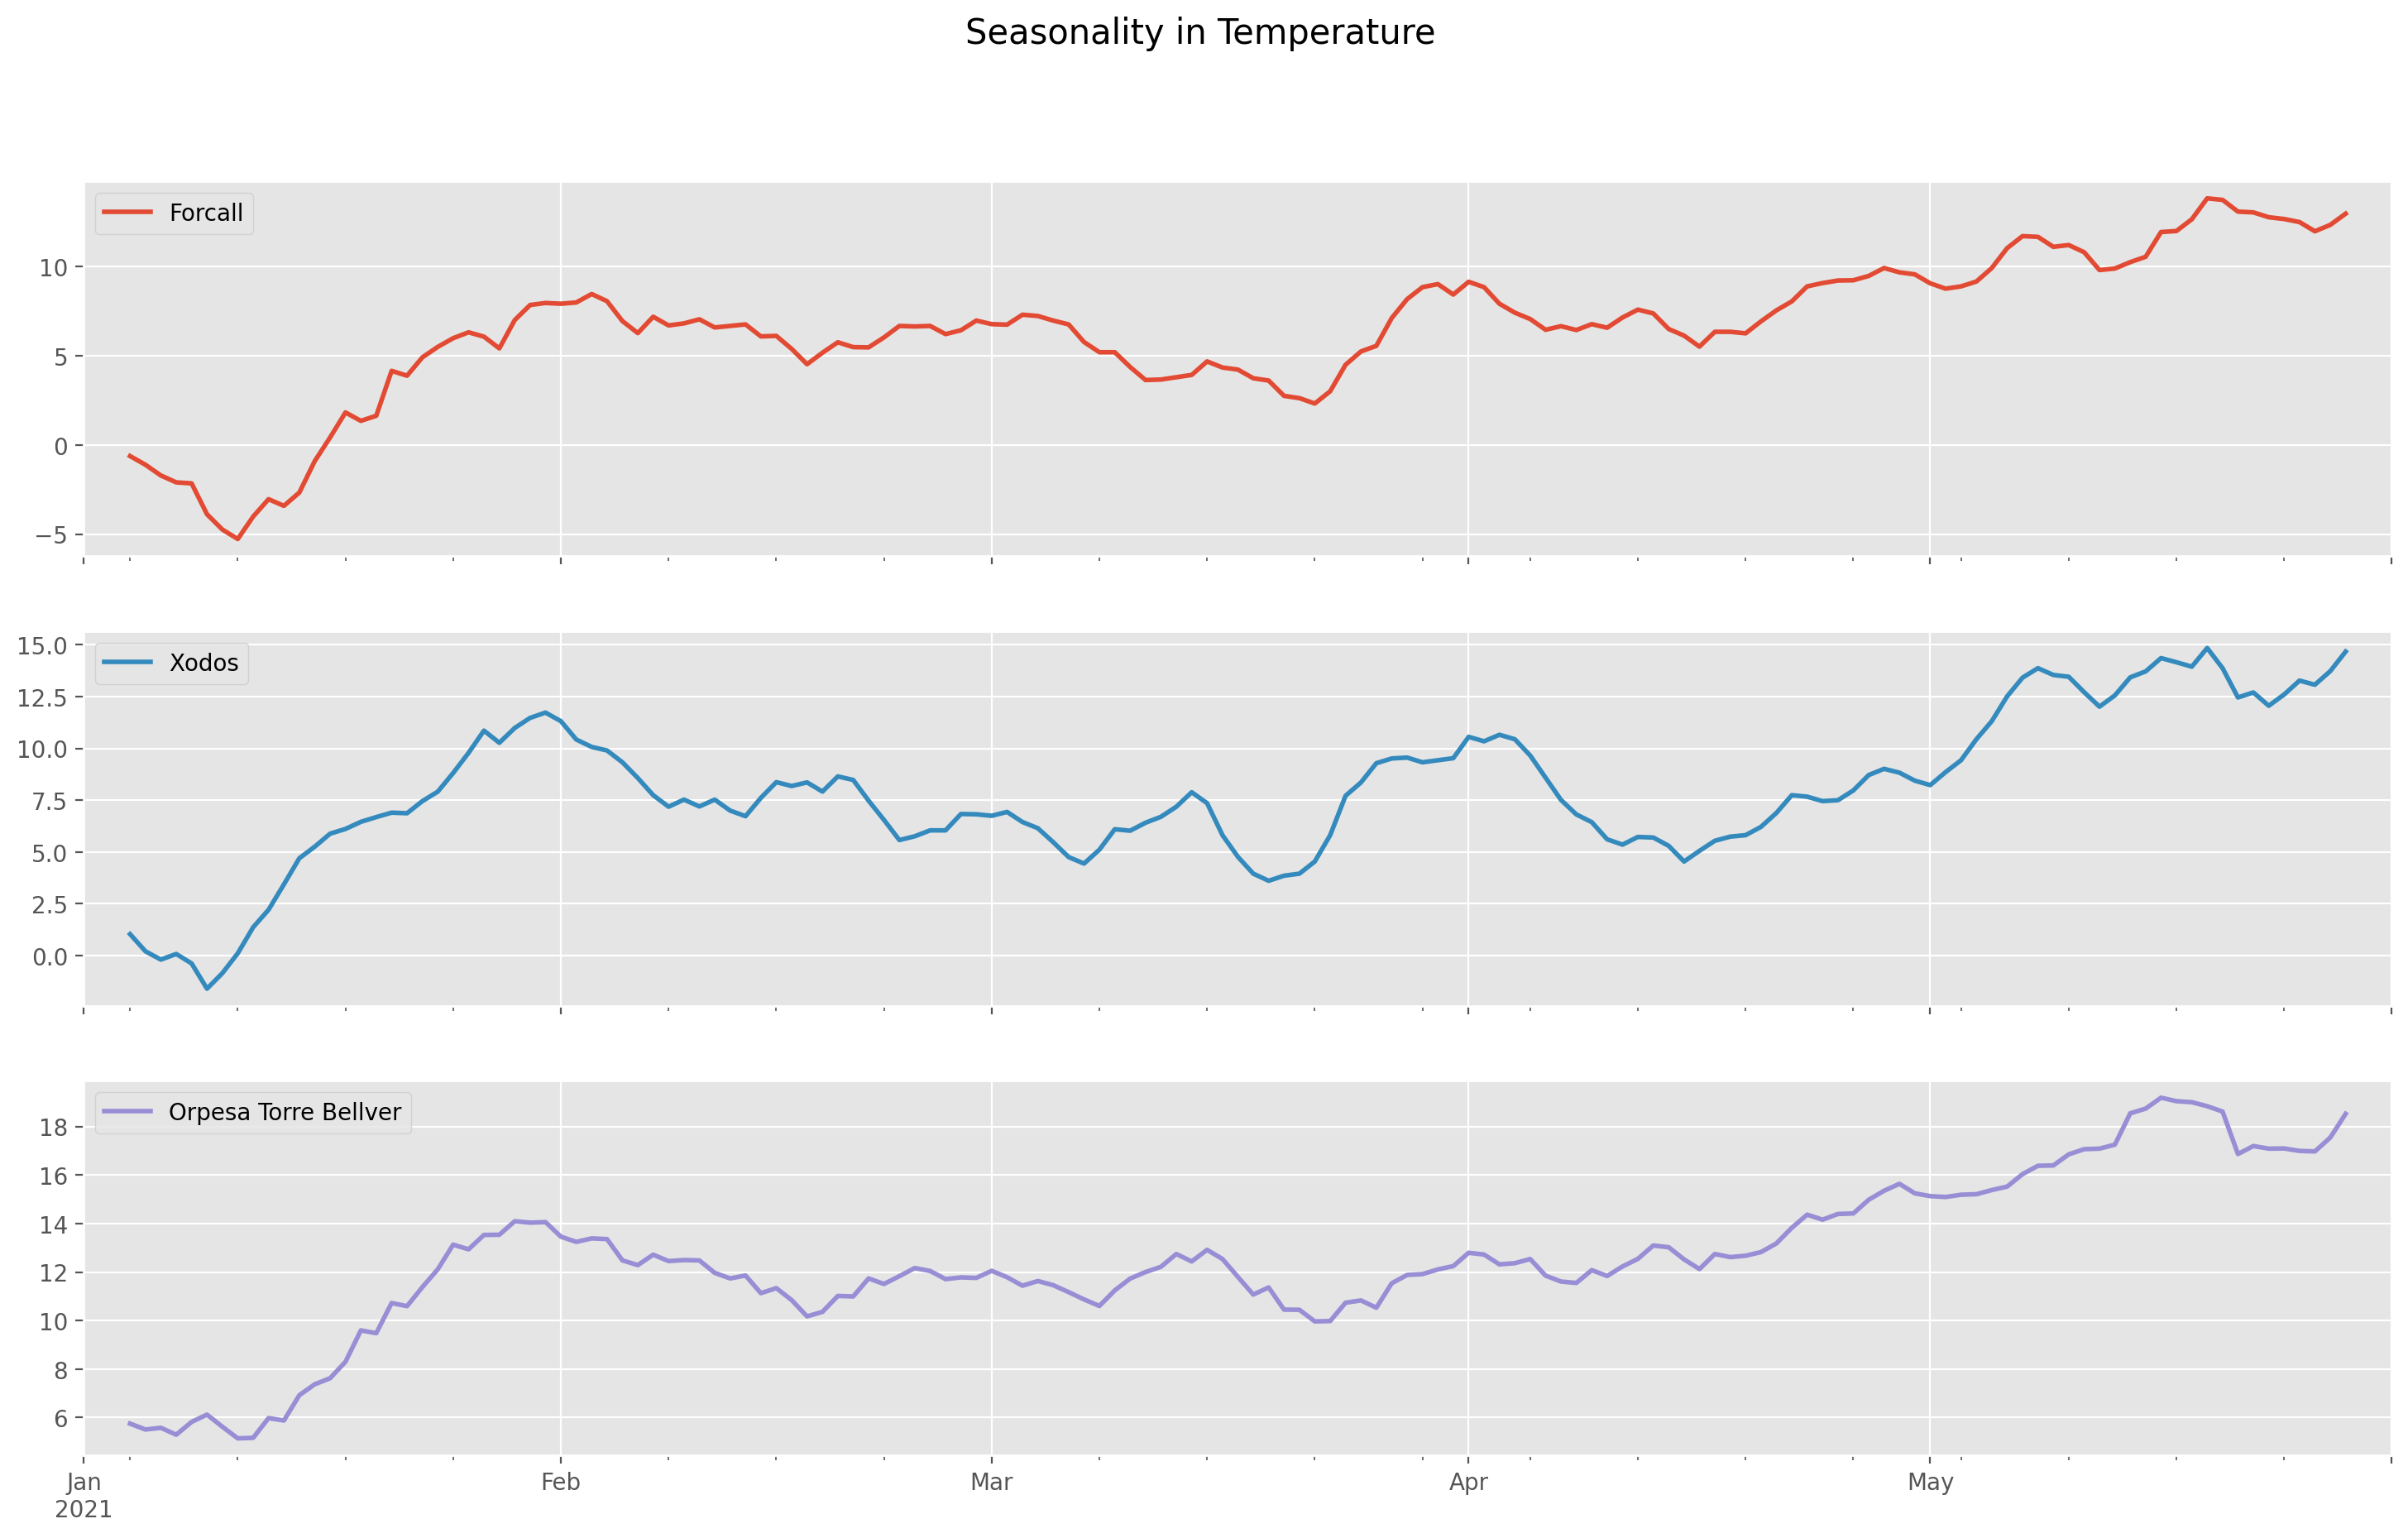

In [ ]:
# Create a faceted plot of the seasonality_df DataFrame
trend_df[["Forcall", "Xodos","Orpesa Torre Bellver"]].plot(
    subplots=True,  # Show multiple plots
    layout=(3, 1),  # Choose layout for showing plots
    sharey=False,  # Share the y axis
    legend=True,  # Show legend
    fontsize=10,  # Set fontsize
    linewidth=2,  # Set widht of line
)

plt.suptitle("Seasonality in Temperature", size=15)
plt.show()


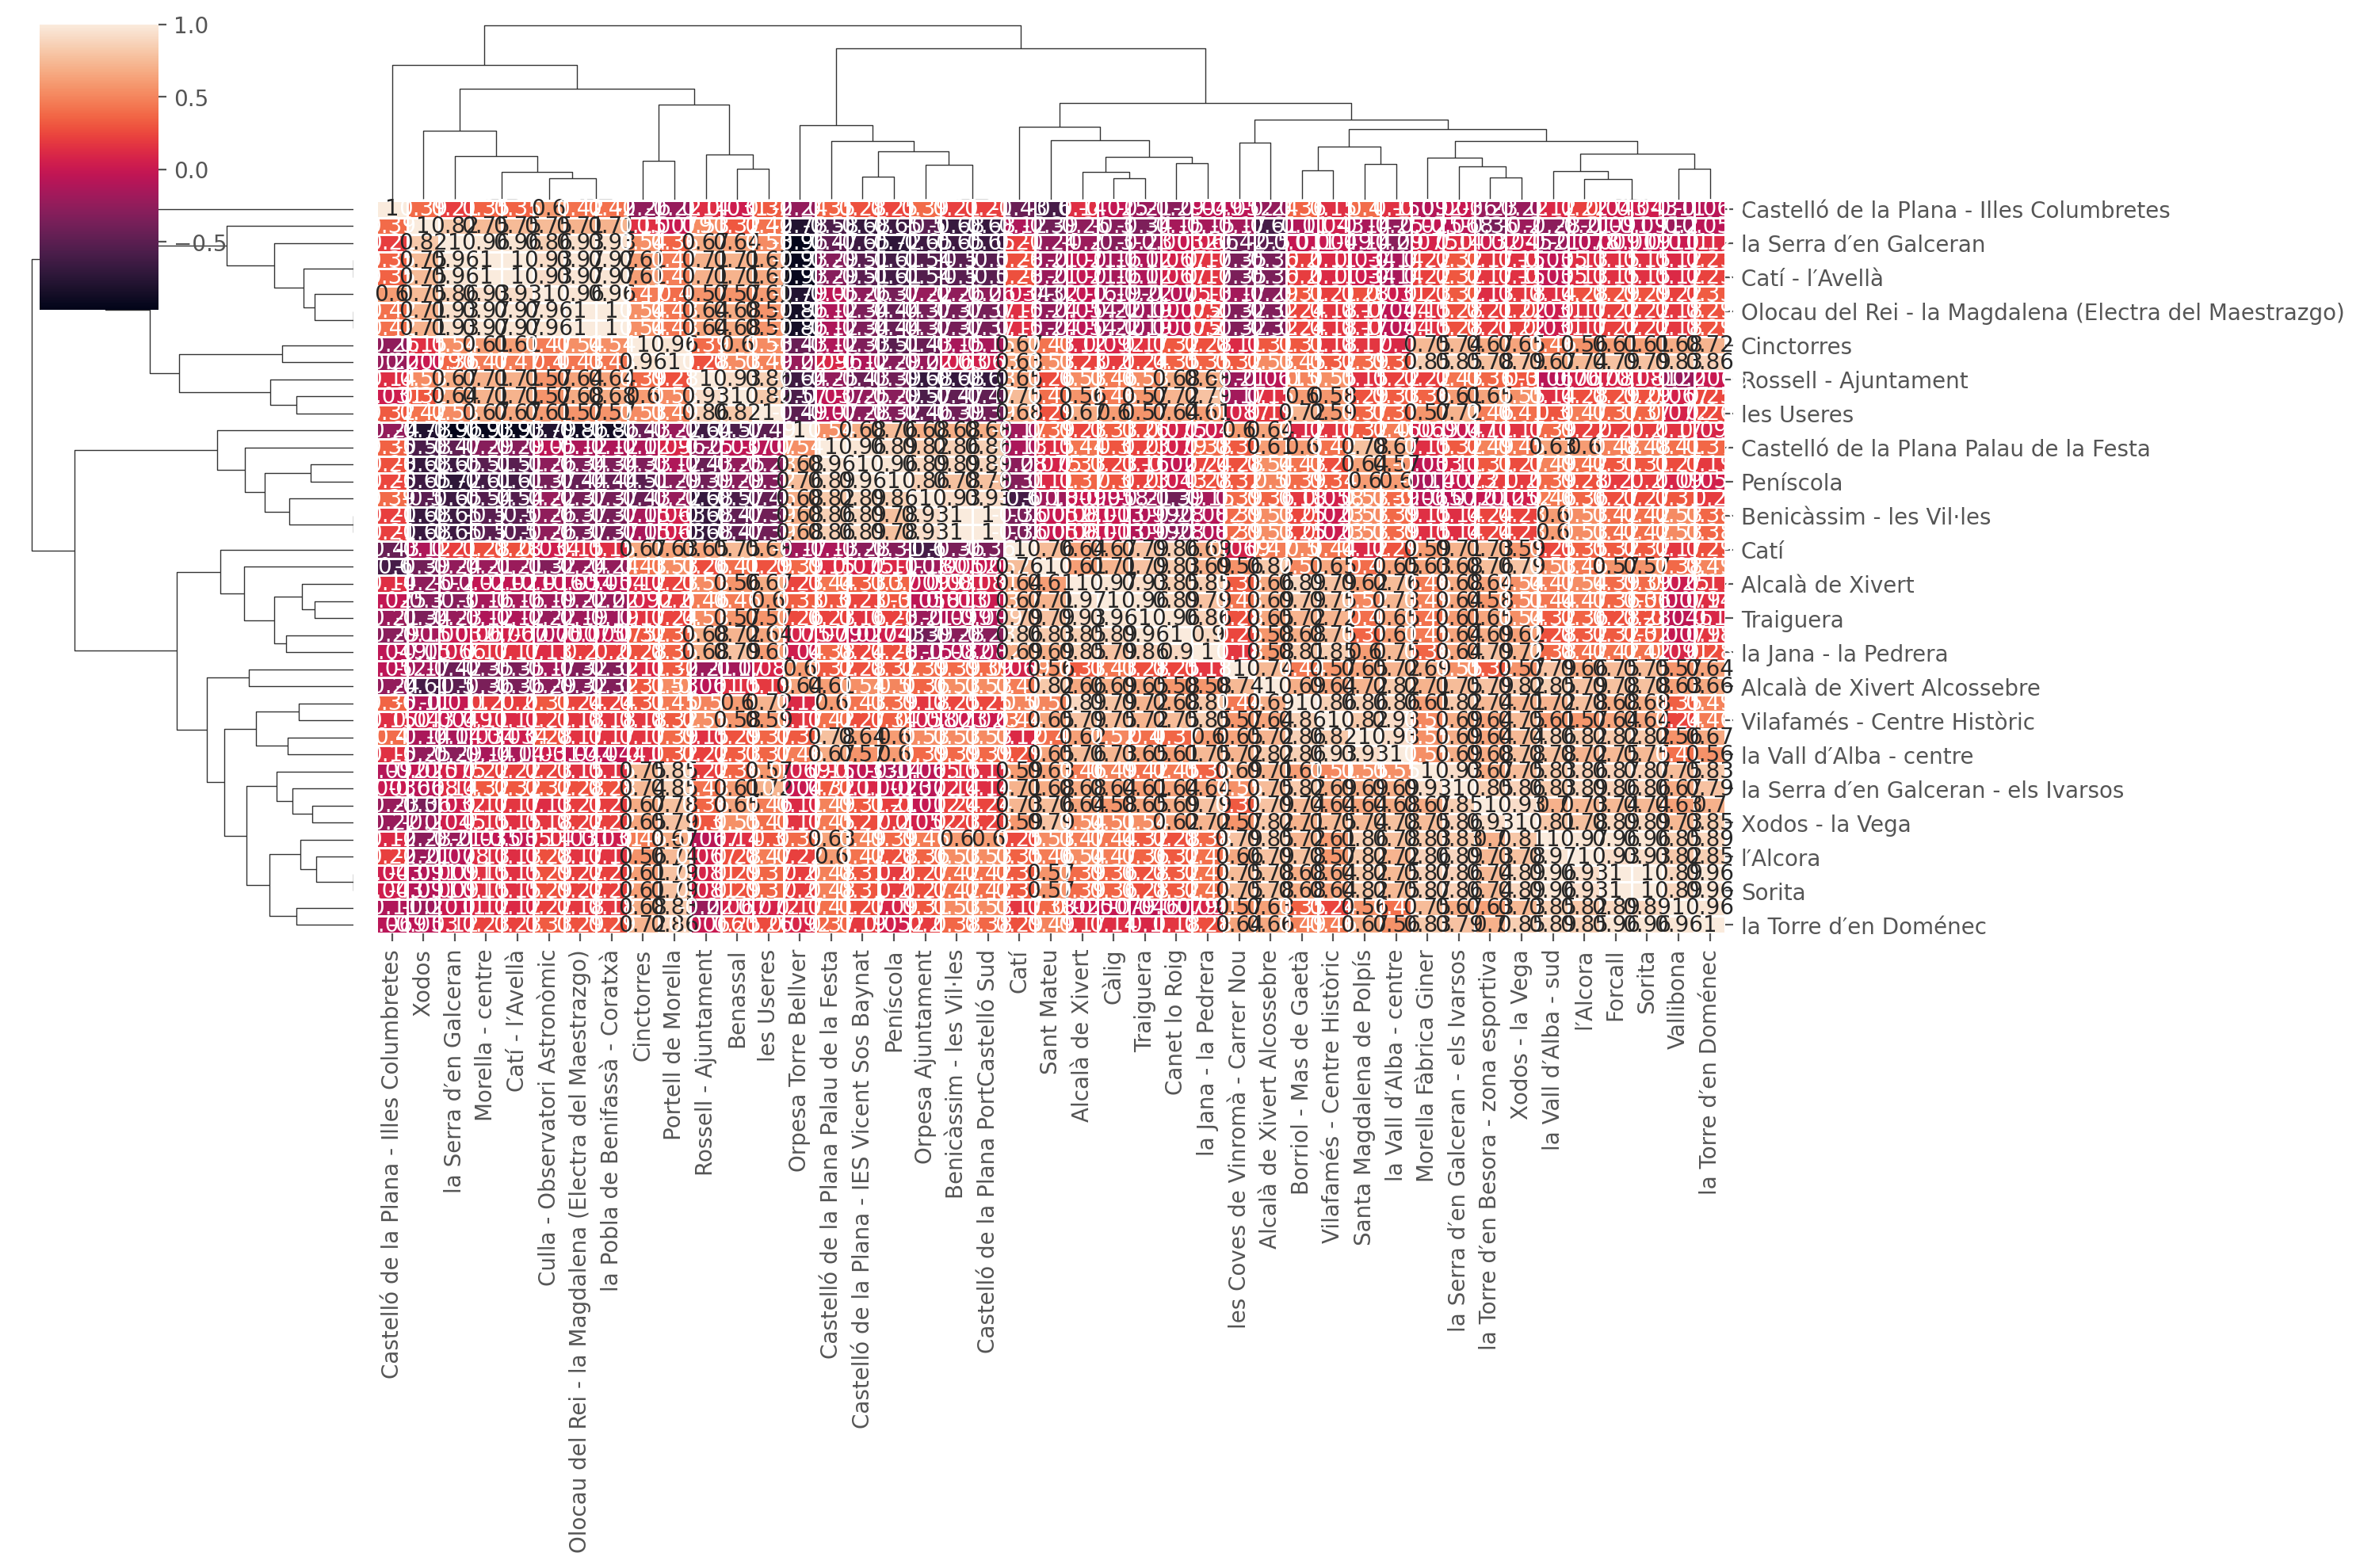

In [ ]:
# Get correlation matrix of your chosen dataframe
seasonality_corr = seasonality_df.corr(
    method="spearman"
)  # Choose method to calculate correlation

# Save the correlation matrix to a CSV file
correlation_matrix_csv = 'correlation_matrix.csv'
seasonality_corr.to_csv(correlation_matrix_csv)

# Customize the clustermap of the correlation matrix
fig = sns.clustermap(
    seasonality_corr,  # Choose correlation matrix to visualize
    annot=True,  # Show annotations
    annot_kws={"size": 10},  # Customize annotations
    linewidths=0.4,
    figsize=(15, 10),
)

plt.setp(
    fig.ax_heatmap.xaxis.get_majorticklabels(),
    rotation=90,  # Change rotation of x-labels
)
plt.show()


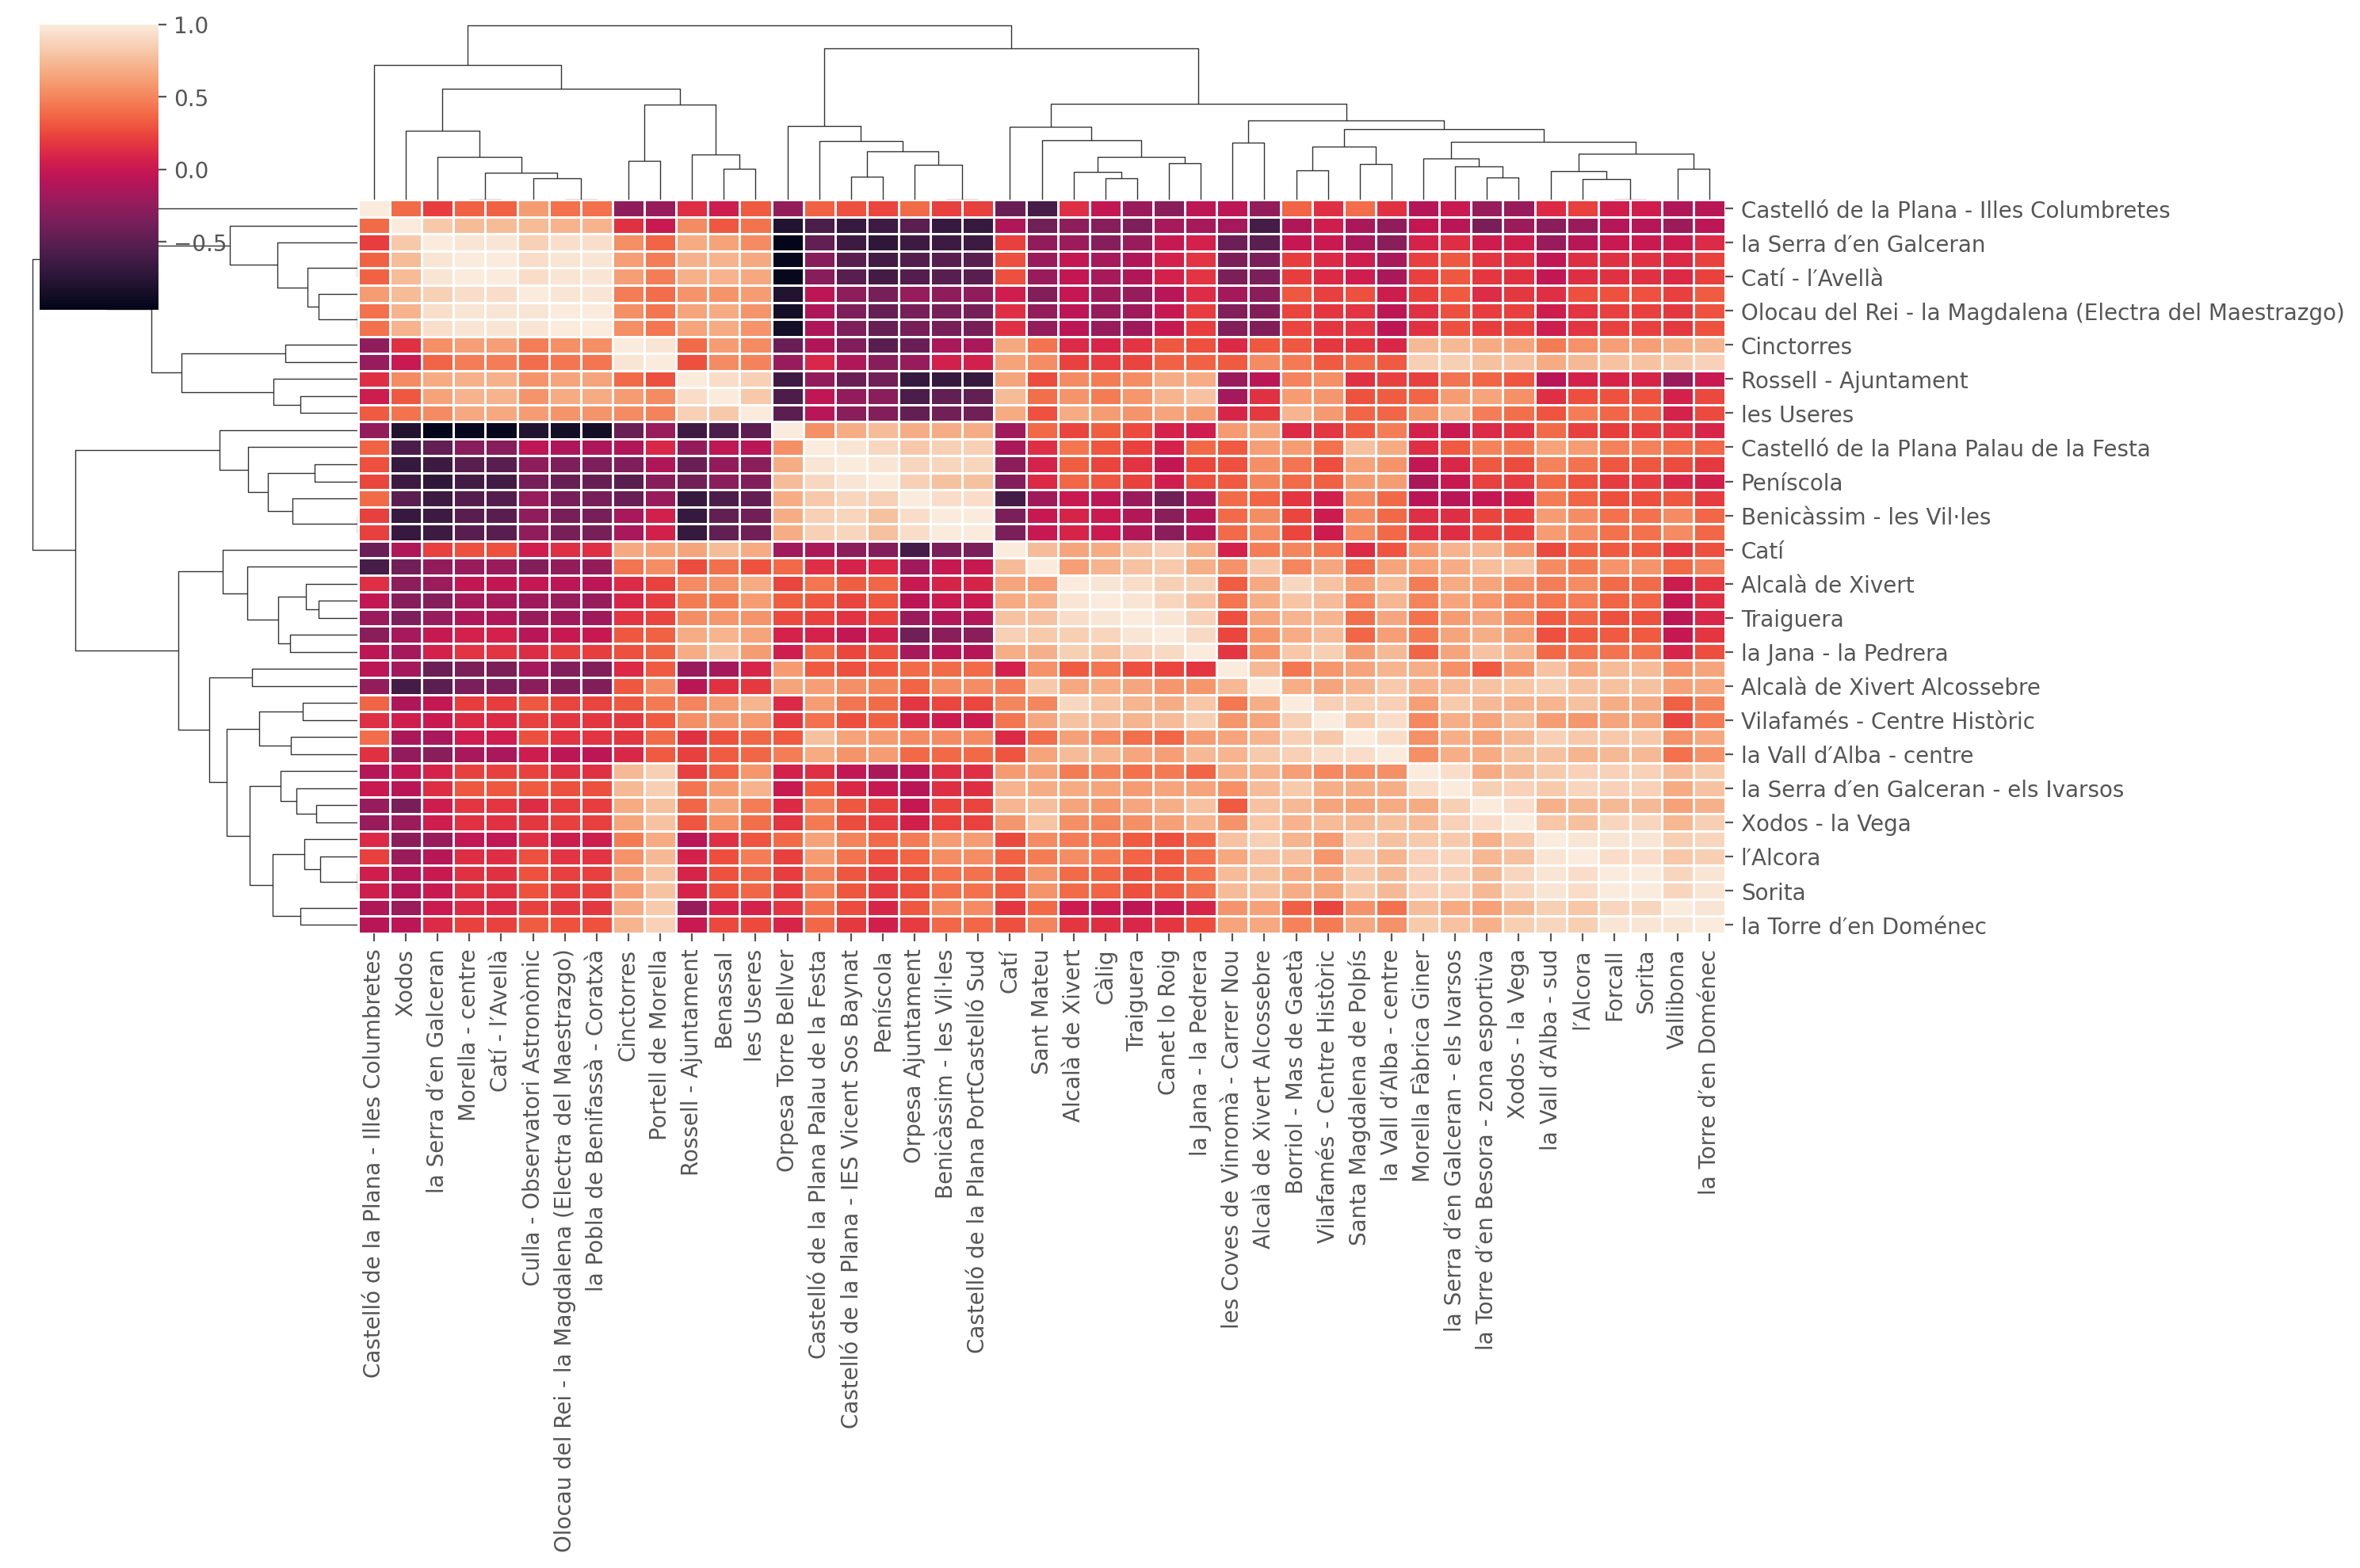

In [ ]:
# Get correlation matrix of your chosen dataframe
seasonality_corr = seasonality_df.corr(
    method="spearman"
)  # Choose method to calculate correlation

# Customize the clustermap of the correlation matrix
fig = sns.clustermap(
    seasonality_corr,  # Choose correlation matrix to visualize
    annot= False,  # Show annotations
    annot_kws={"size": 10},  # Customize annotations
    linewidths=0.4,
    figsize=(15, 10),
)

plt.setp(
    fig.ax_heatmap.xaxis.get_majorticklabels(),
    rotation=90,  # Change rotation of x-labels
)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

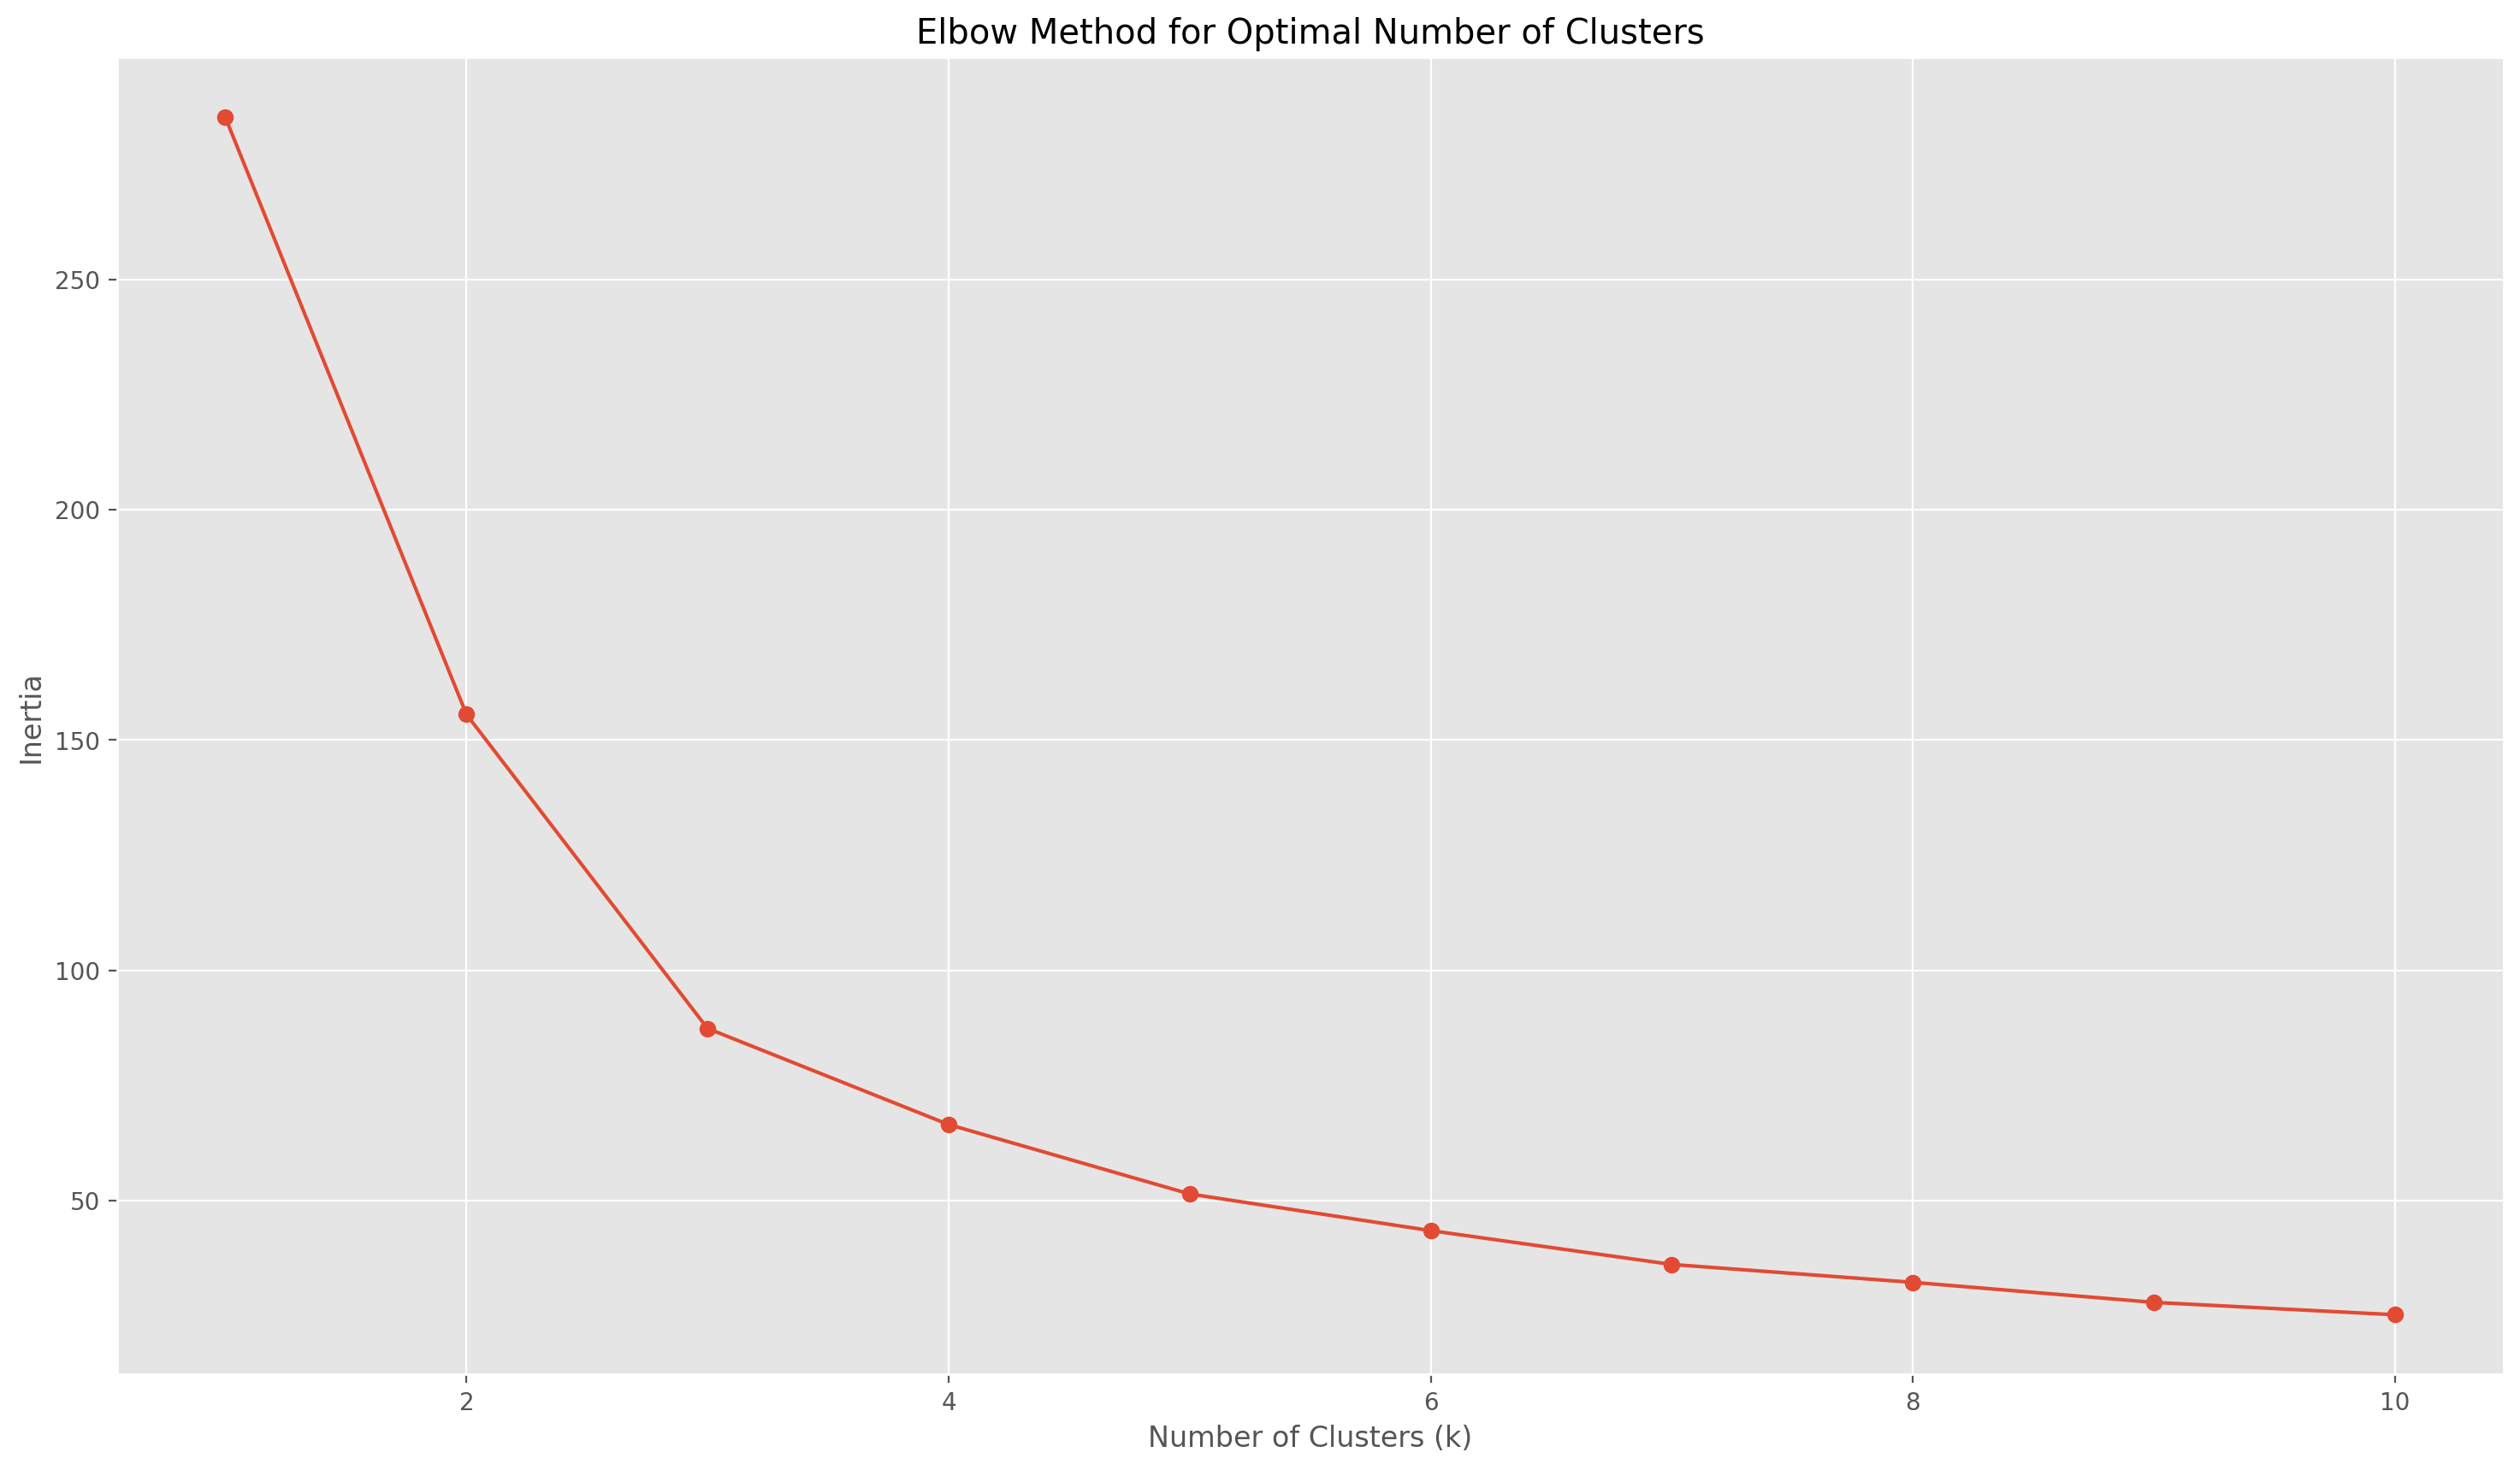

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the correlation matrix from the CSV file
correlation_matrix_csv = 'correlation_matrix.csv'
seasonality_corr = pd.read_csv(correlation_matrix_csv, index_col=0)

# Calculate inertia for different values of k (number of clusters)
inertia = []
max_clusters = 10  # You can adjust the maximum number of clusters as needed

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(seasonality_corr)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Upload your data as CSV and load as a data frame
df = pd.read_csv(
    "TempDataCode21.csv",
    parse_dates=["Timestamp"],  # Tell pandas which column(s) to parse as dates
    index_col="Timestamp",  # Use a date column as your index
)
print(df.shape)
df.head(5)

(151, 43)


c01m045e01  c01m061e01  c01m080e01  c01m083e01  c01m091e01  \
Timestamp                                                                
2021-01-01         4.3         1.7         3.9         1.8         4.2   
2021-01-02         0.3         2.1        -0.1        -1.9         0.0   
2021-01-03        -0.8         1.1        -1.2        -3.1        -1.4   
2021-01-04         1.2        -0.3         0.7        -0.7         1.5   
2021-01-05        -0.5        -1.4        -0.5        -2.1        -0.7   

            c01m127e01  c01m141e01  c02m026e02  c02m042e02  c02m042e03  ...  \
Timestamp                                                               ...   
2021-01-01         0.6         2.5         3.7        5.70    9.082338  ...   
2021-01-02        -0.7         2.2         1.6        2.95    0.300000  ...   
2021-01-03         1.4         1.6         0.3        1.55   -0.800000  ...   
2021-01-04        -0.4        -1.1         0.9        4.00    1.600000  ...   
2021-01-05        -0.3        -2.4        -0.4        1.40   -0.600000  ...   

            c03m004e01  c03m004e02  c03m089e03  c03m100e02  c04m005e01  \
Timestamp                                                                
2021-01-01        4.80        8.20        9.55    2.600000         6.9   
2021-01-02        4.90        4.00        9.05    5.700000         2.6   
2021-01-03        6.30        7.80        7.75    4.500000         4.1   
2021-01-04        2.10        4.50        9.60    1.400000         5.8   
2021-01-05        1.25        3.45        7.95   11.689023         1.3   

            c05m040e11  c05m040e12  c05m085e02  c05m085e03  c05m120e01  
Timestamp                                                               
2021-01-01        9.70        9.65   11.700000        7.35   12.082713  
2021-01-02        6.20        7.10    8.966667        3.55    4.200000  
2021-01-03        8.15        7.95    8.500000        8.25    4.300000  
2021-01-04        9.10        8.70    7.766667        3.45    2.200000  
2021-01-05        5.70        6.80    7.233333        3.05   -0.400000  

[5 rows x 43 columns]

In [ ]:
# Run time series decomposition on each time series of the DataFrame
df_names = df.columns
df_decomp = {ts: sm.tsa.seasonal_decompose(df[ts]) for ts in df.columns}

# Capture the seasonal, trend and noise components for the decomposition of each time series
seasonal_dict = {ts: df_decomp[ts].seasonal for ts in df_names}
trend_dict = {ts: df_decomp[ts].trend for ts in df_names}
noise_dict = {ts: df_decomp[ts].resid for ts in df_names}

# Create a DataFrame from the dictionaries
seasonality_df = pd.DataFrame.from_dict(seasonal_dict)
trend_df = pd.DataFrame.from_dict(trend_dict)
noise_df = pd.DataFrame.from_dict(noise_dict)

# Remove the label for the index
seasonality_df.index.name = None
trend_df.index.name = None
noise_df.index.name = None

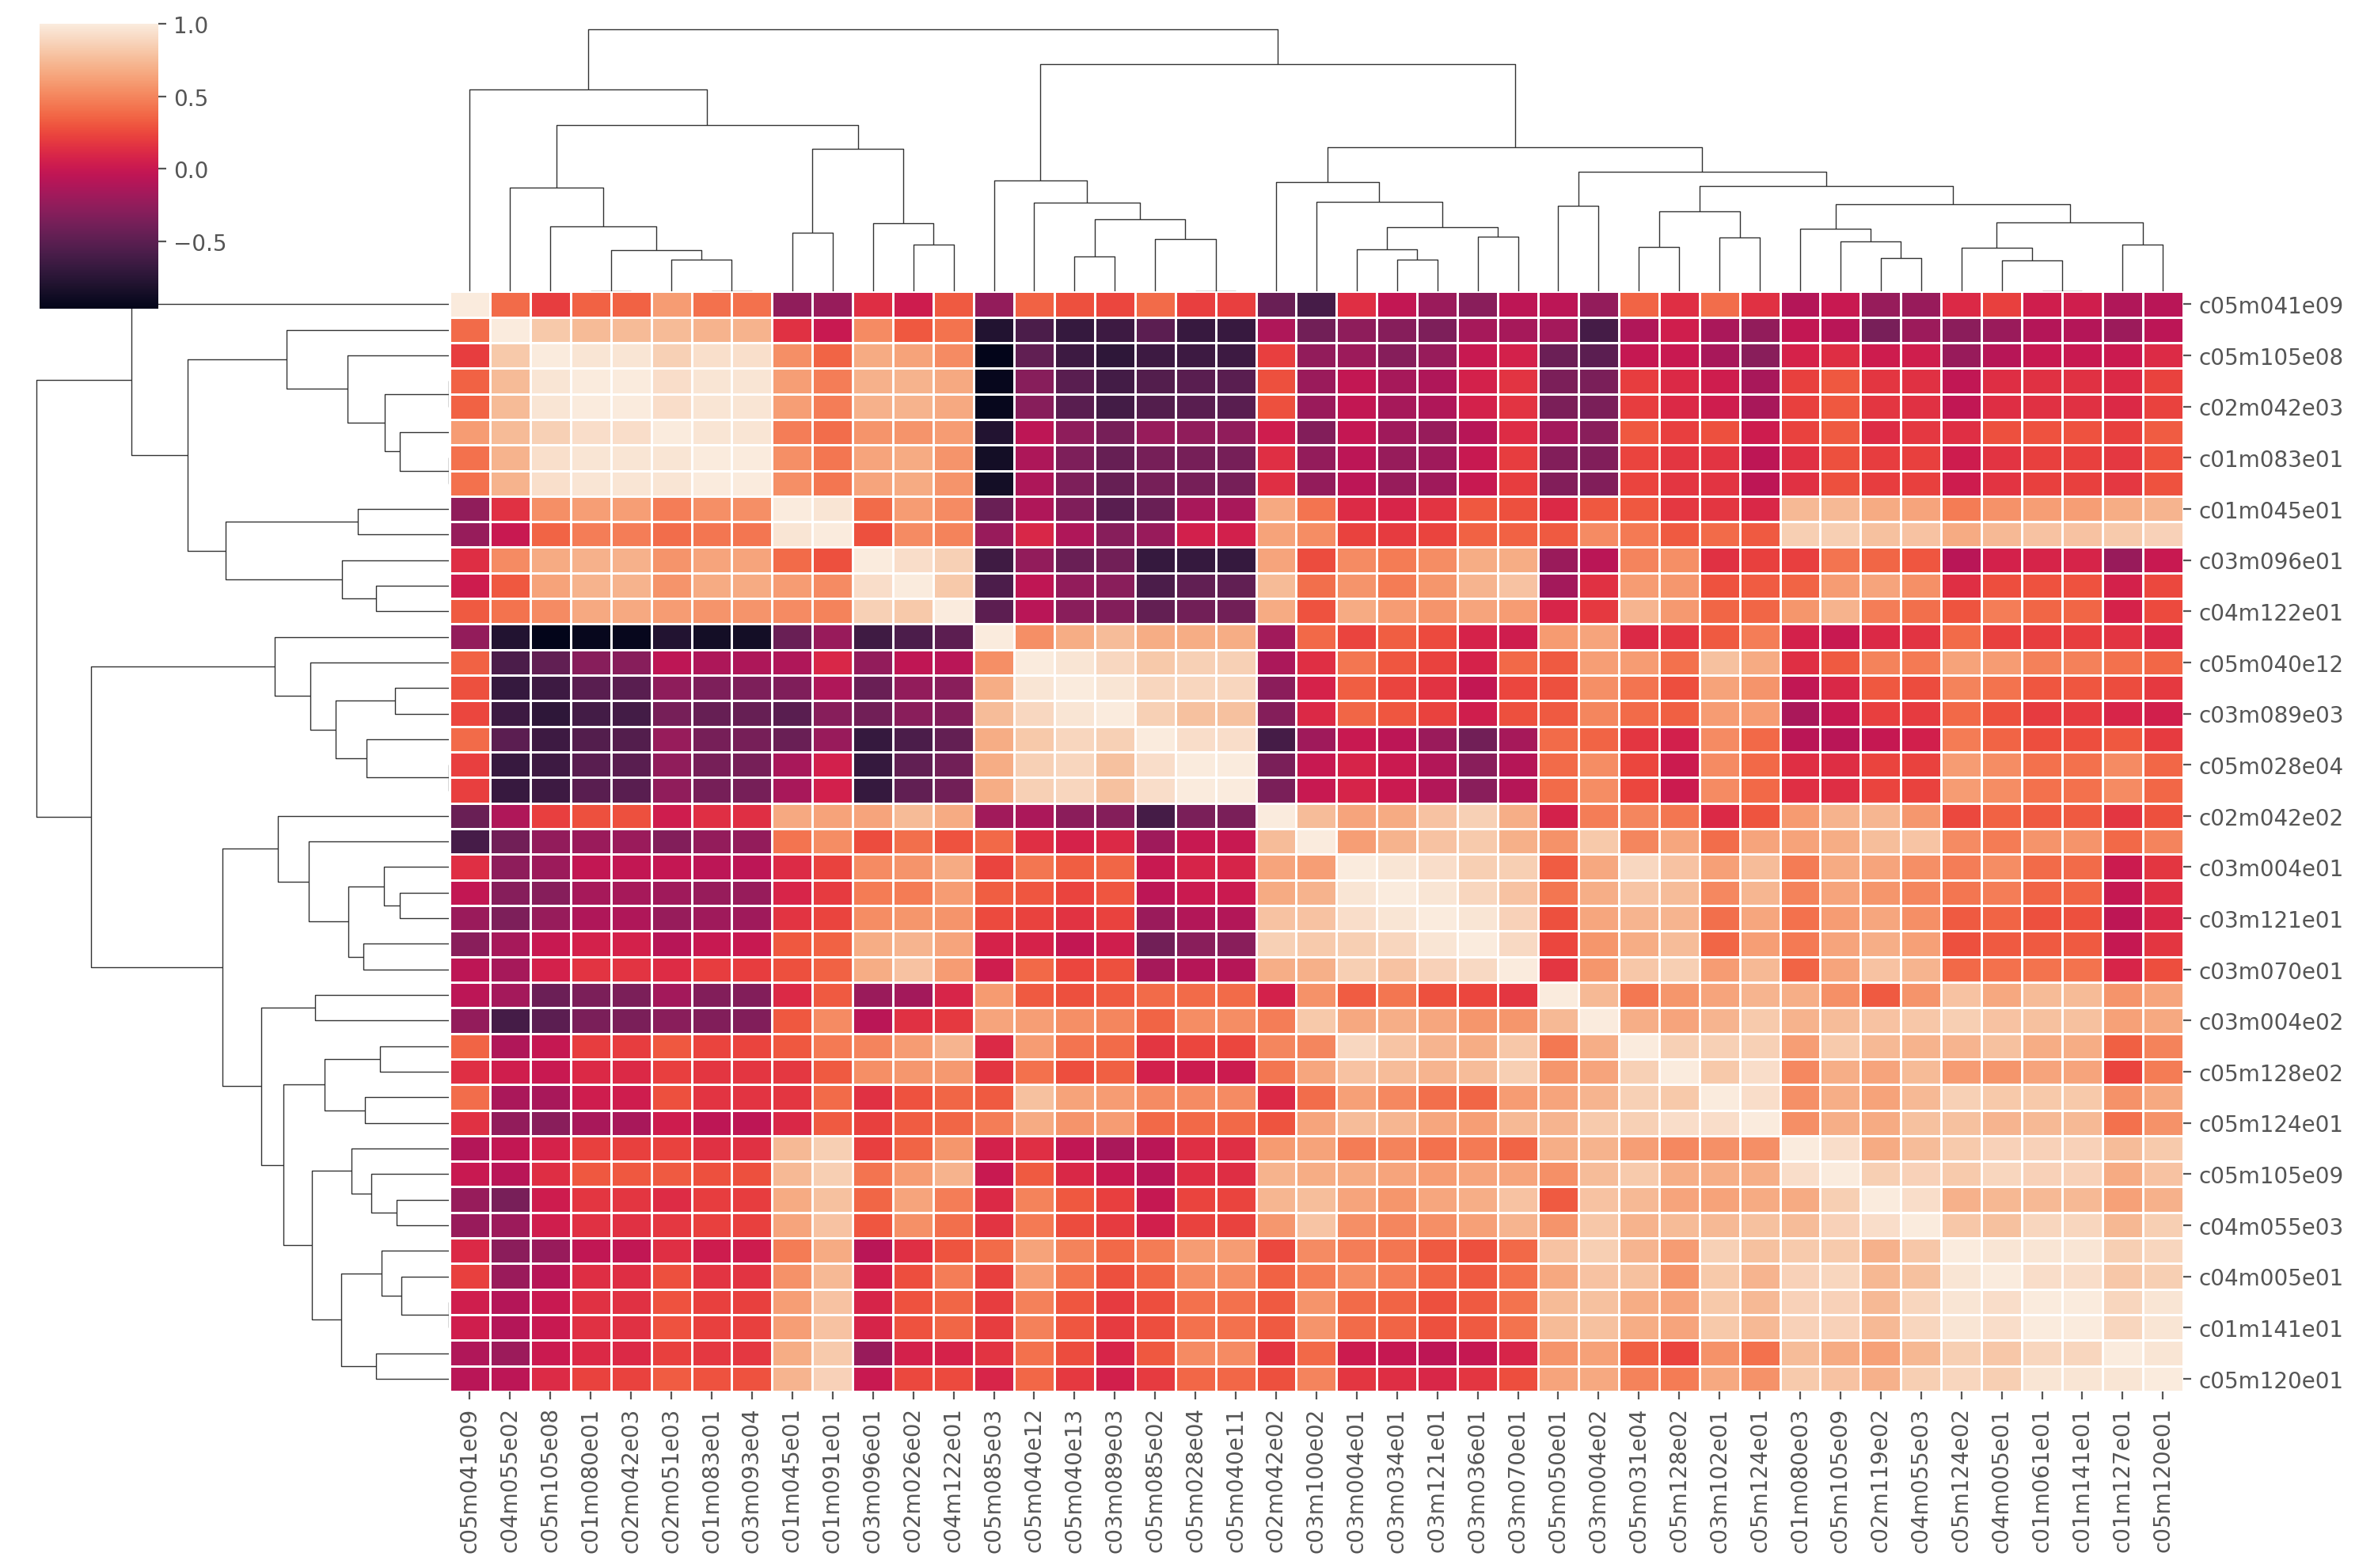

In [ ]:
# Get correlation matrix of your chosen dataframe
seasonality_corr = seasonality_df.corr(
    method="spearman"
)  # Choose method to calculate correlation

# Customize the clustermap of the correlation matrix
fig = sns.clustermap(
    seasonality_corr,  # Choose correlation matrix to visualize
    annot= False,  # Show annotations
    annot_kws={"size": 10},  # Customize annotations
    linewidths=0.4,
    figsize=(15, 10),
)

plt.setp(
    fig.ax_heatmap.xaxis.get_majorticklabels(),
    rotation=90,  # Change rotation of x-labels
)
plt.show()
